<h1 style="text-align: center;"> Logistical Map 分叉图</h1>

<p style="text-align: center;">2025-9-18</p>

课程代码均在如下 GitHub 仓库开源：<https://github.com/GHe0000/scientific-programming-intro>

## 目录

- [1.作业要求](#作业要求)
- [2.思路](#思路（问题背景）)
- [3.数值计算](#数值计算)
- [4.解析计算](#解析计算)
- [5.结论](#结论)
- [6.参考资料](#参考资料)
- [7.致谢](#致谢)
- [8.附一：问题](#附一：问题)
- [8.附二：学习心得](#附二：学习心得)

## 作业要求

1. 简洁地补全 Logistical Map 的背景知识
2. 探索当 $r$ 分别取 $1$, $3.3$, $3.51$, $3.82842712$, $4$ 时， $x$ 随迭代步数的变化，描述观察到的现象. 
3. 在整个区间，画出分岔图. 

##  Logistical Map 背景知识

逻辑斯谛映射是一个通过以下迭代方程定义的离散时间动力学系统：

$$x_{n+1} = r \cdot x_n \cdot (1 - x_n)$$

其中：

* $x_n$ 是一个介于0和1之间的数，表示在第 $n$ 次迭代时的系统状态（例如，某个物种的数量相对于其最大可能数量的比例）. $x_0$ 是系统的初始状态（$0 \le x_0 \le 1$）. 
* $r$ 是一个正常数，通常取值范围在 $[0, 4]$ 之间. 这个参数控制着系统的行为

这个模型最初由生物学家罗伯特·梅（Robert May）在1976年的一篇极具影响力的《自然》杂志论文中进行推广，并用其来模拟种群的动态演化. 

* $x_n$：某个物种在第 $n$ 年的数量. 为了简化，这个值被归一化到 $[0, 1]$ 区间，其中0代表种群灭绝，1代表环境能承载的最大种群数量. 
* $r \cdot x_n$ 项：这个部分模拟了种群的“繁殖”过程. 当 $r$ 较大且 $x_n$ 较小时，种群数量会倾向于增长. 
* $(1 - x_n)$ 项：这个部分模拟了“抑制”或“竞争”效应. 当种群数量 $x_n$ 接近最大容量1时，$(1 - x_n)$ 的值会趋近于0，这代表由于资源有限、天敌增多等因素导致的种群数量增长放缓甚至下降. 

因此，这个简单的公式同时包含了促进增长和抑制增长两个核心因素，这使得它的行为变得非常丰富. 

## 不动点分析

### 求不动点

对于 Logistic Map：

$$ x_{n+1} = r \cdot x_n \cdot (1 - x_n) \tag{1} $$

其迭代函数为：

$$ f(x) = r x (1-x), \quad x_{n+1} = f(x_n) \tag{2}$$

记这个迭代函数的不动点为 $x^*$，其满足 $x^* = f(x^*)$，解得：

$$ x^*_1 = 0,\quad x^*_2 = 1-\frac{1}{r} $$

其中由于上述迭代函数自变量取值范围为 $[0,1]$, 因此第二个不动点 $x^*_2$ 只有在 $0\leq 1-\frac{1}{r} \leq 1$ 才有意义，这要求 $r\geq1$.

### 不动点的稳定性

根据作业二和课堂上的知识，我们知道不动点的稳定性由迭代函数在该点的导数 $f'\left(x^*\right)$ 的绝对值决定. 具体而言
- 如果 $\left| f'\left( x^* \right) \right|<1$，则 $x^*$ 是稳定不动点.
- 如果 $\left| f'\left( x^* \right) \right|>1$，则 $x^*$ 是不稳定不动点.
- 如果 $\left| f'\left( x^* \right) \right|=1$，则 $x^*$ 稳定性需要更高阶的展开来分析.

对于 Logistic Map，我们求其迭代函数的一阶导数：

$$ f'\left(x\right) = r - 2 r x \tag{3} $$

- 对于 $x^*_1 = 0$, 有 $ f'\left(x^*_1 \right) = r $，故当 $0 \leq r < 1$ 时 $x^*_1$ 是稳定不动点. $r > 1$ 时 $x^*_1$ 是不稳定不动点.

- 对于 $x^*_2 = 1 - \frac{1}{r}$，有 $ f'\left(x^*_2 \right) =  2 - r$，故当 $1 < r <3$ 时 $x^*_2$ 是不动点. $r < 1$ 或 $r > 3$ 时 $x^*_2$ 是不稳定不动点. 

当 $r$ 为题目中需要探索的 $r$ 时，$x^*_1$ 和 $x^*_2$ 均是不稳定不动点（$r = 1$ 是分界，两个不动点重合，但其稳定性均需要更高阶的展开来分析）. 因此就上面解析分析我们无法得到此动力学系统在 $r$ 取这些值的情况的渐进行为. 这里我们先通过数值计算的方式进行探索.

## $r=1$ 和 $r>3$ 时不同 $r$ 的渐进行为

### 计算前准备

导入需要的库，并针对 Jupyter Notebook 进行一些设置.

In [1]:
import numpy as np # 数值计算库
import numba as nb # 引入 jit 来加速函数（如果需要）
import sympy as sym # 符号计算库
import matplotlib.pyplot as plt # 图像绘制
from matplotlib.backends.backend_agg import FigureCanvasAgg # 设置图像后端用
import ipywidgets as ipw # 交互控件
from IPython.display import display, Math # 打印数学公式

# 设置随机数种子确保结果的可复现性
np.random.seed(3407)

# 使用 mathjax 来在 jupyter notebook 显示数学公式
sym.init_printing(use_latex='mathjax')

# 设置 matplotlib 绘制的图像嵌入到 jupyter notebook 的方式
%matplotlib widget

# 一个工具函数，可以让静态图片不经过 widget 直接嵌入 Jupyter notebook
# 这样图片可以直接存到 nb 文件里，而不是需要运行才能显示（类似 inline）
def display_inline(fig):
    fig.set_canvas(FigureCanvasAgg(fig))
    display(fig)
    plt.close(fig) # 释放 fig，减小资源消耗

# 设置 matplotlib 使用的字体，避免出现中文问题
plt.rcParams['font.family'] = ['SimSun', 'Times New Roman']
plt.rcParams['mathtext.fontset'] = 'cm'

# 设置默认坐标轴字体大小
plt.rcParams['axes.labelsize'] = 14

# 其他需要用到的库
from scipy.optimize import fsolve

这里我们根据式(2)写出 Logistic Map 的迭代函数：

In [2]:
logistic_map = lambda r,x : r*x*(1-x)

另外，从前面两次作业和课堂上我们知道，分析这种迭代函数的一个非常好用的方式就是通过**蛛网图**，具体而言，对于迭代方程 $x_{n+1} = f(x_n)$，绘制蛛网图的过程为：

1. 绘制 $x_{n+1} = f(x_n)$ 和 $x_{n+1}=x_n$ 的函数图像
2. 对于给定的初始值 $x_0$，$(x_0,x_0)$ 作为起始点
3. 做垂线交 $f(x_n)$ 于新的一点，这一步表示 $x_{n+1}$ 设为 $f(x_n)$
4. 在第三步交点做水平线交 $x_{n+1}=x_n$ 与新的一点，这一步表示旧的 $x_{n+1}$ 将作为新的 $f(x)$ 的自变量
5. 重复三、四步，直至达到指定的次数 $n$

这里考虑到蛛网图会在后面以及可能的之后的作业重复使用，这里将之前作业的绘制蛛网图的代码封装成一个函数.

In [3]:
def plot_cobweb(ax, map_func, x_range, x_n, x0, n):
    '''
    绘制迭代方程 map_func 的蛛网图

    参数：
    ax: maplotlib.axes
        需要绘制的轴对象
    map_func: callable
        迭代函数，只有一个传入参数
    x_range: (x_min, x_max)
        需要绘制的范围
    x_n: int 或 float
        采样点数量
    x0: float
        迭代初始值
    n: int 或 float
        迭代次数

    返回：
    ax: maplotlib.axes
        绘制的轴对象
    '''
    n = int(n)
    x_arr = np.linspace(x_range[0], x_range[1], int(x_n))
    path = np.zeros((2*n+1, 2))
    path[0] = np.array([x0, x0])
    xp = x0
    for i in range(n):
        path[2*i+1] = np.array([xp, map_func(xp)])
        xp = map_func(xp)
        path[2*i+2] = np.array([xp, xp])
    ax.plot(path[:,0], path[:,1], '--o', markersize=4, label="迭代过程")
    ax.plot(x_arr, x_arr, label="$x_{n+1}=x_n$")
    ax.plot(x_arr, map_func(x_arr), label="$x_{n+1}=f(x_n)$")
    return ax

### $r=1$

#### 数值探索

现在我们来探索 $r=1$ 的情况，迭代的初始值 $x_0$ 先取个特殊值看看情况（取 $x_0=0.5$，$n=50$）：

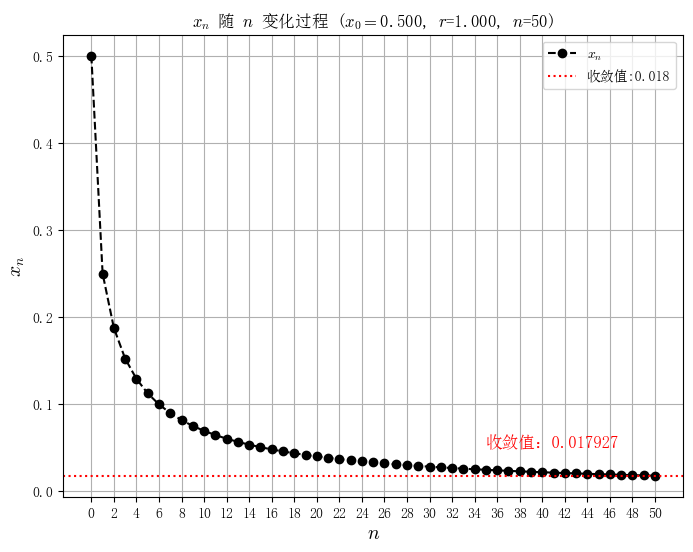

In [4]:
r = 1
x0 = 0.5
n = 50

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, 'k--o', label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%2==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r:.3f}, $n$={n})")
ax.axhline(xn_arr[-1], color='r', linestyle=':', label=f"收敛值:{xn_arr[-1]:.3f}")
ax.text(35, 0.05, f"收敛值：{xn_arr[-1]:.6f}", color='r', size=12)
ax.grid()
ax.legend()

display_inline(fig)

看起来会收敛到 $0$, 但是收敛速度比较慢，这里我们增大 $n$ 试试：

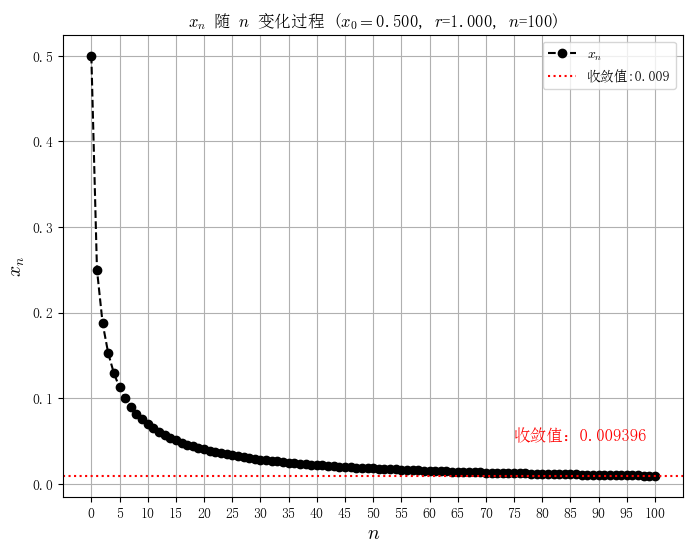

In [5]:
r = 1
x0 = 0.5
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, 'k--o', label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r:.3f}, $n$={n})")
ax.axhline(xn_arr[-1], color='r', linestyle=':', label=f"收敛值:{xn_arr[-1]:.3f}")
ax.text(75, 0.05, f"收敛值：{xn_arr[-1]:.6f}", color='r', size=12)
ax.grid()
ax.legend()

display_inline(fig)

看上去确实会收敛到 $0$, 只是收敛速度比较慢. 猜测这可能是因为其 $|f'(0)|=1$ 导致的，毕竟 $r=1$ 时 $x^*_1=x^*_2=0$ 的稳定性需要更高阶导数决定. 之后需要给出解析计算. 

这里先探寻这个收敛值是否和迭代的初始值有关，在 $[0,1]$ 内均匀取 $10$ 个点作为 $x_0$，绘制迭代过程：

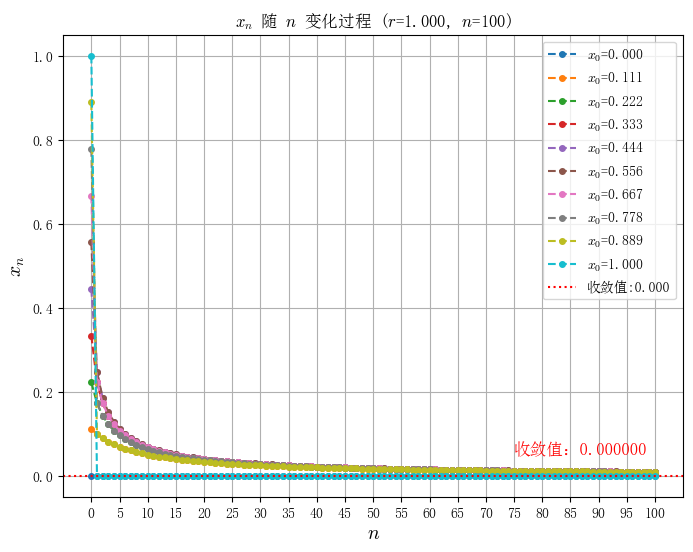

In [6]:
r = 1
x0 = np.linspace(0,1,10)
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(x0)), dtype=np.float64)
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(x0):
    ax.plot(n_arr, xn_arr[:,i], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($r$={r:.3f}, $n$={n})")
ax.axhline(xn_arr[-1][0], color='r', linestyle=':', label=f"收敛值:{xn_arr[-1][0]:.3f}")
ax.text(75, 0.05, f"收敛值：{xn_arr[-1][0]:.6f}", color='r', size=12)
ax.grid()
ax.legend()

display_inline(fig)

可以看见当 $r=1$ 时收敛到 $0$ 和取值无关，看起来此时 $x^*=0$ 是一个稳定不动点. 当 $r=1$，$x_0=0.5$ 时的蛛网图如下：

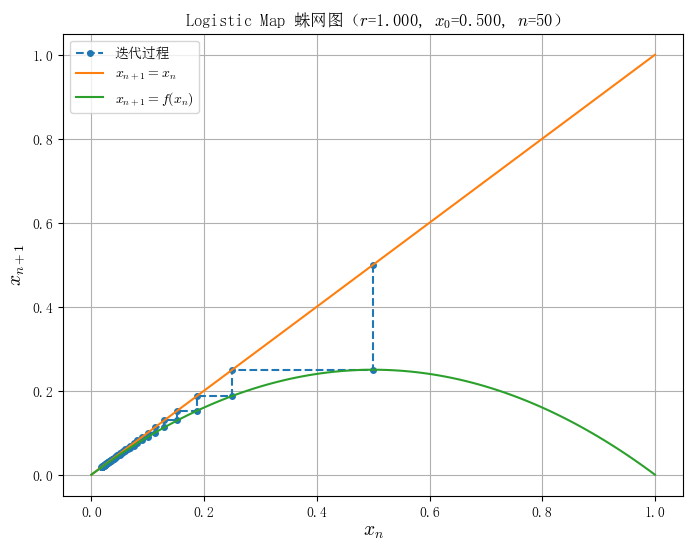

In [7]:
r = 1
x0 = 0.5
n = 50
map_func = lambda x: logistic_map(r, x)
fig, ax = plt.subplots(figsize=(8,6))
ax = plot_cobweb(ax, map_func, (0,1), 100, x0, n)
ax.grid()
ax.legend()
ax.set_xlabel("$x_{n}$")
ax.set_ylabel("$x_{n+1}$")
ax.set_title(f"Logistic Map 蛛网图（$r$={r:.3f}, $x_0$={x0:.3f}, $n$={n}）")
display_inline(fig)

#### 解析分析

下面我们尝试通过解析的方式证明当 $r=1$ 时，系统会收敛到 $0$, 或者说当 $r=1$ 时 $x^*=0$ 是系统的稳定不动点.

记第 $n$ 次迭代的结果为 $x_n$，$x_n$ 离 $x^*=0$ 的距离为 $\delta_n = x_n-x^*= x_n$（不加绝对值是因为 $x_n \geq x^*$）. $r=1$ 时迭代方程为 $ x_{n+1} = x_n (1-x_n) \equiv f(x_n) $. 由于 $f(x)$ 本身就是多项式，这里不再进行 Taylor 展开，因此有：

$$ \delta_{n+1} = \delta_{n} (1-\delta_{n}) $$

由于 $1-\delta_n < 1$（$\delta_n >0$） 因此，$\delta_{n+1} < \delta_n$，因此当 $r=1$ 时 $x^*=0$ 是迭代方程 $f(x) = r x (1-x)$ 的稳定不动点. 

### $r=3.3$

#### 数值探索

现在我们探究当 $r=3.3$ 时的情况，为了方便检验收敛值对初值的敏感性，之后的 $x_n$ 随 $n$ 的变化过程我们统一在 $[0,1]$ 内均匀取 $10$ 个点作为 $x_0$ 来绘制迭代过程：

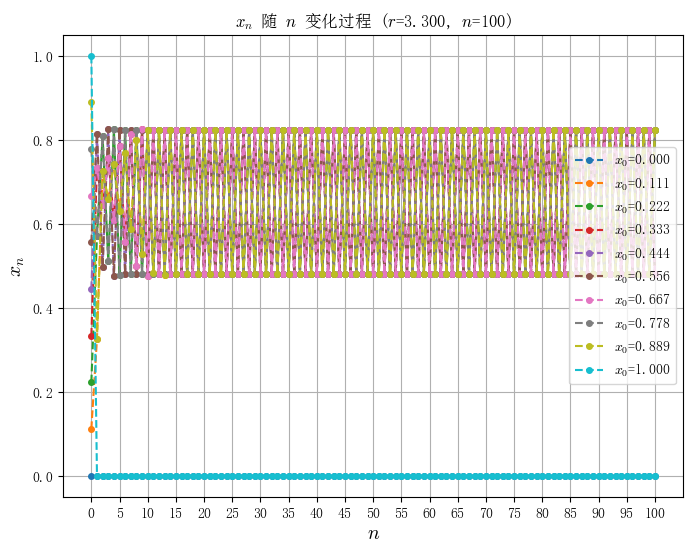

In [8]:
r = 3.3
x0 = np.linspace(0,1,10)
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(x0)), dtype=np.float64)
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(x0):
    ax.plot(n_arr, xn_arr[:,i], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($r$={r:.3f}, $n$={n})")
ax.grid()
ax.legend()

display_inline(fig)

可以发现，除开 $x_0 = 0$ 和 $x_0 = 1$ 收敛到 $x_n = 0$ 外，剩余的初值 $x_0$ 在最后会在两个值之间跳跃（图中点形成两条水平线）.

$x_0 =0 $ 和 $x_0=1$ 的情况是比较 Trival 的，对于任意的 $r$，$0$ 均是迭代映射的不动点，因此 $0 = f(0)$（对于任意的 $r$），且由于 $0$ 可以在计算机中由浮点数精确表示，因此不会因为计算的精度误差导致其在迭代过程中“偏离” $0$（注意在 $r>1$ 时 $0$ 是不稳定的不动点）. 而对于 $x_0=1$，其经过一次迭代后 $x_1 = f(x_0) = 0$（对于任意的 $r$），因此其最后的渐进行为和 $x_0 = 0$ 相同（前面有限项的不同对渐进行为没有影响）. 

上面对于初值 $x_0=0$ 和 $x_0=1$ 的行为的分析对任意 $r$ 均适用，后面取不同 $r$ 进行分析时不再叙述. 现在我们取渐进行为比较有趣的 $x_0 = 0.111$ 看看迭代过程：

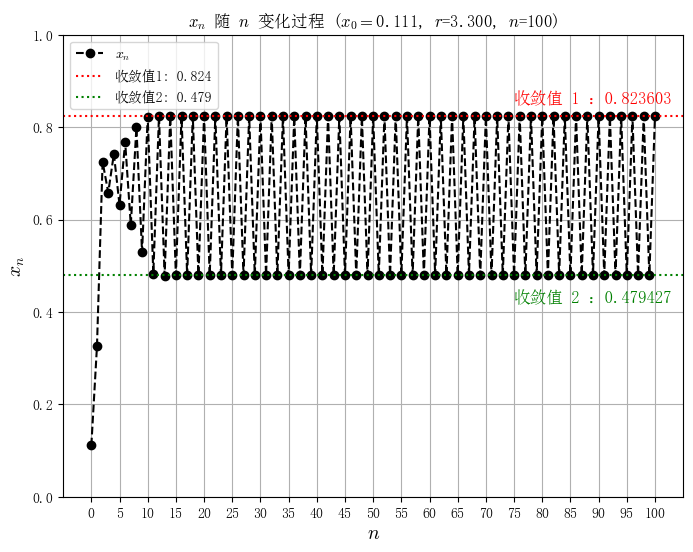

In [9]:
r = 3.3
x0 = 0.111
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, 'k--o', label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylim(0,1)
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r:.3f}, $n$={n})")
ax.axhline(xn_arr[-1], color='r', linestyle=':', label=f"收敛值1: {xn_arr[-1]:.3f}")
ax.text(75, 0.85, f"收敛值 1 ：{xn_arr[-1]:.6f}", color='r', size=12)
ax.axhline(xn_arr[-2], color='g', linestyle=':', label=f"收敛值2: {xn_arr[-2]:.3f}")
ax.text(75, 0.42, f"收敛值 2 ：{xn_arr[-2]:.6f}", color='g', size=12)
ax.grid()
ax.legend()

display_inline(fig)

可以看到，当 $r=3.3$，$x_0=0.111$ 时最后 $x_n$ 在 $0.823603$ 和 $0.479427$ 之间循环. 并且由前一张图我们知道对于任意的 $x\in (0,1)$ 均有这个性质. 这里我们绘制此时对应的蛛网图查看迭代过程：

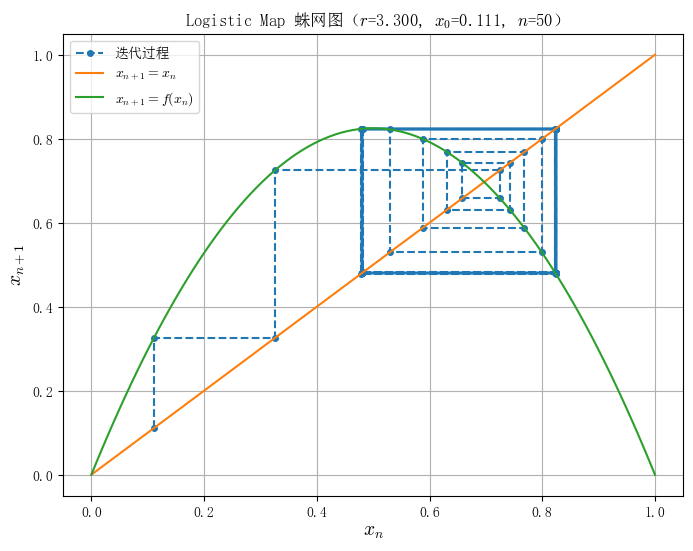

In [10]:
r = 3.3
x0 = 0.111
n = 50
map_func = lambda x: logistic_map(r, x)
fig, ax = plt.subplots(figsize=(8,6))
ax = plot_cobweb(ax, map_func, (0,1), 100, x0, n)
ax.grid()
ax.legend()
ax.set_xlabel("$x_{n}$")
ax.set_ylabel("$x_{n+1}$")
ax.set_title(f"Logistic Map 蛛网图（$r$={r:.3f}, $x_0$={x0:.3f}, $n$={n}）")
display_inline(fig)

可以看到此时的蛛网图出现了一个比较有趣的过程，当迭代到足够多的步骤后，其迭代过程均在一个方形的“环”上.

#### 解析分析

我们尝试通过解析的方式进行描述，当 $r=3.3$ 时的渐进行为为 $x_n$ 在固定的两个值之间交替循环，也就是 $x_n$ 经过两次迭代后返回到原来的值，也就是稳定时：

$$ x^* = f(f(x^*)) \tag{4}$$

这可以看成是对 $f(f(x))$ 求不动点. 我们可以将这种不动点称为 $f(x)$ 的**二阶不动点**，而之前我们求的 $f(x)$ 的不动点是 $f(x)$ 的**一阶不动点**. 这里我们使用 `sympy` 来进行符号计算.

首先我们先写出 $f(f(x))$：

In [11]:
sym.var("x,r")
ff = logistic_map(r,logistic_map(r,x))
display(Math("f(f(x))="+sym.latex(sym.expand(ff))))

<IPython.core.display.Math object>

可以看见 $f(f(x))$ 是一个四次方程，可以通过解析求解，因此进一步计算 $f(f(x))=x$：

In [12]:
sym.solve(ff-x, x)

⎡                 ______________             ______________    ⎤
⎢                ╱  2                       ╱  2               ⎥
⎢   r - 1  r - ╲╱  r  - 2⋅r - 3  + 1  r + ╲╱  r  - 2⋅r - 3  + 1⎥
⎢0, ─────, ─────────────────────────, ─────────────────────────⎥
⎣     r               2⋅r                        2⋅r           ⎦

可以看到我们得到四个二阶不动点，其中的 $0$ 和 $\frac{r-1}{r}$ 是我们之前求出的一阶不动点，显然一阶不动点肯定也是二阶不动点，因此这两个解是 Trival 的.

比较有趣的解是下面这两个：

$$ x^* = \frac{r \pm \sqrt{r^2-2r-3}+1}{2r} $$

这两个解相比一阶不动点是新增的，猜测其中任意一个点迭代一次后会得到另外一个点，这里进行符号验证：

In [13]:
sol = sym.solve(ff-x, x)
display(Math("f\\left("+sym.latex(sol[2])+"\\right)=" + sym.latex(logistic_map(r, sol[2]).simplify())))
display(Math("f\\left("+sym.latex(sol[3])+"\\right)=" + sym.latex(logistic_map(r, sol[3]).simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

上述符号计算证实了我们的猜想. 因此，我们有理由猜测，当 $r=3.3$ 时

$$ x^* = \frac{r \pm \sqrt{r^2-2r-3}+1}{2r} $$

正是最后收敛到的两个值. 这里带入数值进行计算（$r=3.3$）：

In [14]:
display(Math("f\\left(" + sym.latex(sol[2]) + "\\right) \\approx" + sym.latex(sol[2].subs(r, 3.3).evalf())))
display(Math("f\\left(" + sym.latex(sol[3]) + "\\right) \\approx" + sym.latex(sol[3].subs(r, 3.3).evalf())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

可以看到，这两个二阶不动点正是我们之前通过数值计算得到的最后收敛的两个值.

现在我们对这四个二阶不动点进行稳定性分析. 仿照一阶不动点的稳定性分析，我们计算 $f(f(x))$ 的导数：

In [15]:
display(Math("\\left(f(f(x))\\right)'="+sym.latex(sym.expand(sym.diff(ff,x)))))

<IPython.core.display.Math object>

带入

$$ x=0,\quad x=\frac{r-1}{r}, \quad x = \frac{r \pm \sqrt{r^2-2r-3}+1}{2r} $$

并化简：

In [16]:
for i in range(4):
    display(Math("\\left( f \\left(f\\left(" + sym.latex(sol[i]) + "\\right) \\right) \\right)' =" + sym.latex(sym.diff(ff, x).subs(x, sol[i]).simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- 要使得 $x^*=0$ 为二阶稳定不动点，要求 $|r^2| < 1$，也就是 $0\leq r < 1$，和 $x^*=0$ 为一阶稳定不动点相同. 

- 要使得 $x^*=\frac{r-1}{r}$ 为二阶稳定不动点，要求 $|r^2-4r+4| < 1$，也就是 $1<r<3$ 和 $x^*=\frac{r-1}{r}$ 为一阶稳定不动点相同.

上述两个点作为二阶稳定不动点的条件和一阶稳定不动点相同，说明迭代两次并没有给其带来稳定性的变化.

对于另外两个二阶不动点，这里我们注意到其稳定性条件是相同的，都是 $|-r^2+2r+4|<1$，这个现象是容易理解的，<u>因为这两个二阶不动点是成对出现的，因此其稳定性条件应该是相同的</u>.

要使得二阶不动点

$$ x^* = \frac{r \pm \sqrt{r^2-2r-3}+1}{2r} $$

是稳定不动点，需要 $ -1 < -r^2+2r+4 < 1$，解得 $3<r<1+\sqrt{6}$ （根据 Logistic Map 定义，我们忽略了 $r<0$ 的取值范围）

由于 $3.3 \in (3,1+\sqrt{6})$，因此当 $r=3.3$ 时，

$$ x^* = \frac{r \pm \sqrt{r^2-2r-3}+1}{2r} $$

是稳定的二阶不动点. 这和我们之前通过数值模拟得到的结果相对应.

### $ r=3.51 $

#### 数值探索

现在我们探究当 $r=3.51$ 时的情况，同样我们在 $[0,1]$ 内均匀取 $10$ 个点作为 $x_0$ 来绘制迭代过程：

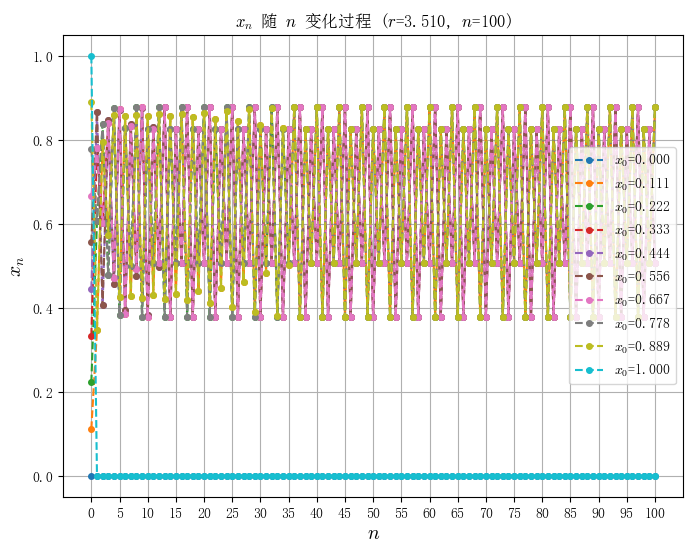

In [17]:
r = 3.51
x0 = np.linspace(0,1,10)
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(x0)), dtype=np.float64)
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(x0):
    ax.plot(n_arr, xn_arr[:,i], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($r$={r:.3f}, $n$={n})")
ax.grid()
ax.legend()

display_inline(fig)

 除去前文我们已经探讨过的 $x_0=0$ 和 $x_0=1$ 收敛于 $0$ 这两个 Trival 的情况，我们发现，其他的初值在迭代次数足够多后的点分布在四条水平直线上，也就是在迭代次数足够多后，$x_n$ 会在四个值之间跳跃.

 我们选取其中的 $x_0 = 0.222$ 看看迭代过程.

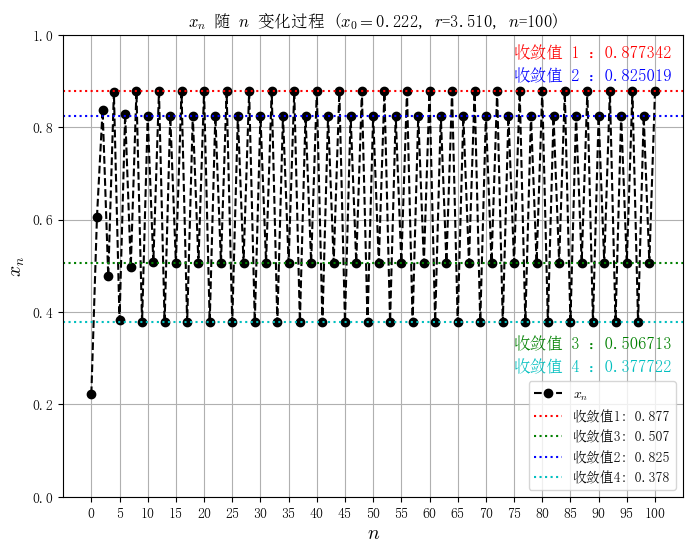

In [18]:
r = 3.51
x0 = 0.222
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, 'k--o', label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylim(0,1)
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r:.3f}, $n$={n})")
ax.axhline(xn_arr[-1], color='r', linestyle=':', label=f"收敛值1: {xn_arr[-1]:.3f}")
ax.text(75, 0.95, f"收敛值 1 ：{xn_arr[-1]:.6f}", color='r', size=12)
ax.axhline(xn_arr[-2], color='g', linestyle=':', label=f"收敛值3: {xn_arr[-2]:.3f}")
ax.text(75, 0.32, f"收敛值 3 ：{xn_arr[-2]:.6f}", color='g', size=12)
ax.axhline(xn_arr[-3], color='b', linestyle=':', label=f"收敛值2: {xn_arr[-3]:.3f}")
ax.text(75, 0.9, f"收敛值 2 ：{xn_arr[-3]:.6f}", color='b', size=12)
ax.axhline(xn_arr[-4], color='c', linestyle=':', label=f"收敛值4: {xn_arr[-4]:.3f}")
ax.text(75, 0.27, f"收敛值 4 ：{xn_arr[-4]:.6f}", color='c', size=12)
ax.grid()
ax.legend()

display_inline(fig)

可以看到，当 $r=3.51$，$x_0=0.222$ 时最后 $x_n$ 在 $0.506713$、$0.877342$、$0.825019$ 和 $0.377722$ 之间循环. 并且由前一张图我们知道对于任意的 $x\in (0,1)$ 均有这个性质. 这里我们绘制此时对应的蛛网图查看迭代过程：

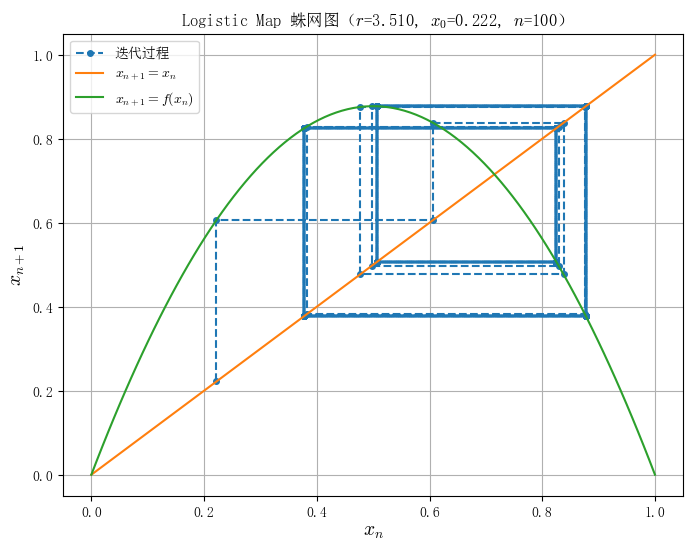

In [19]:
r = 3.51
x0 = 0.222
n = 100
map_func = lambda x: logistic_map(r, x)
fig, ax = plt.subplots(figsize=(8,6))
ax = plot_cobweb(ax, map_func, (0,1), 100, x0, n)
ax.grid()
ax.legend()
ax.set_xlabel("$x_{n}$")
ax.set_ylabel("$x_{n+1}$")
ax.set_title(f"Logistic Map 蛛网图（$r$={r:.3f}, $x_0$={x0:.3f}, $n$={n}）")
display_inline(fig)

可以看到在迭代到足够多的步骤后，蛛网图的迭代过程在一个八个点的“环”上.

#### 半解析分析

和前面 $r=3.3$ 时类似，由于最后 $x_n$ 会在 $4$ 个值之间循环，因此我们可以猜测 $x_n$ 最后会在四阶不动点循环，即不动点 $x^*$ 满足（$\circ$ 为复合算子）：

$$ x^* = (f \circ f \circ f \circ f) (x^*) $$

为了方便表示，我们定义 $f_n (x) \equiv (f \circ \cdots \circ f) (x)$ （其中 $f(x)$ 作用了 $n$ 次） ，因此，四阶不动点满足：

$$ x^* = f_4 (x^*) $$

我们使用 `sympy` 来解析求解四阶不动点. 首先先定义函数：

In [20]:
def fn(r, x, n):
    for i in range(n):
        x = logistic_map(r, x)
    return x

sym.var("r,x")
f4 = fn(r, x, 4)
display(Math("f_4(x)=" + sym.latex(sym.simplify(f4))))

<IPython.core.display.Math object>

$f_4(x)$ 展开写成：

In [21]:
display(Math("f_4(x)=" + sym.latex(sym.expand(f4))))

<IPython.core.display.Math object>

可见这是一个 $16$ 阶多项式，我们尝试使用 `sympy` 求解不动点（对于高次多项式方程，`sympy` 并不能保证得到所有的解，毕竟对于大于四阶的多项式方程，数学证明没有根式解）：

In [22]:
sym.solve(f4-x,x)

⎡                 ______________             ______________    ⎤
⎢                ╱  2                       ╱  2               ⎥
⎢   r - 1  r - ╲╱  r  - 2⋅r - 3  + 1  r + ╲╱  r  - 2⋅r - 3  + 1⎥
⎢0, ─────, ─────────────────────────, ─────────────────────────⎥
⎣     r               2⋅r                        2⋅r           ⎦

上述的四个解均为二阶不动点. 显然二阶不动点一定是四阶不动点. 因此这四个结果都是 Trival 的，这里我们没有得到我们想要的额外的解. 因此我们只能尝试通过数值来求解不动点.（也因此这里的标题是 `半解析分析`，由于还是涉及到了代值计算，因此并不是完全解析的）

我们设定 $r=3.51$，并在 $[0,1]$ 内数值求解 $f_4(x) = x$ 的解：

In [23]:
r_num = 3.51
f4_tmp = sym.lambdify(x, (f4-x).subs(r, r_num) , "numpy")
init_guesses = np.linspace(0, 1, 100) # 均匀选取 100 个猜测初始值
found = []
for guess in init_guesses:
    root, info, ier, mesg = fsolve(f4_tmp, guess, full_output=True)
    if ier == 1:
        found.append(root[0])
roots = np.array(sorted(list(set(np.round(found, 10))))).flatten()
print(f"一共找到 {len(roots)} 个不同的解")
print(roots)

一共找到 15 个不同的解
[0.         0.12121212 0.18181818 0.19191919 0.2020202  0.21212121
 0.22222222 0.37772216 0.42640911 0.50671306 0.71509972 0.82501893
 0.85849118 0.87734182 0.94949495]


这里我们一共找到了 15 个解，这里面出现了先前找到的四个二阶不动点：

- $0$
- $\frac{r-1}{r} \approx 0.71509972$
- $\frac{r-\sqrt{r^2-2r-3}+1}{2r} \approx 0.42640911$
- $\frac{r+\sqrt{r^2-2r-3}+1}{2r} \approx 0.85849118$

也出现了我们通过数值迭代得到的四个收敛值：

- $0.377722$
- $0.506713$
- $0.825019$
- $0.877342$

因此我们需要分析为何在前面的数值迭代中最后只收敛到了上面四个值. 这需要对找到的这些四阶不动点进行稳定性分析.

我们使用 `sympy` 求出 $f'_4(x)$

In [24]:
df4 = sym.diff(f4,x)
display(Math("f'_4(x)=" + sym.latex(df4.expand())))

<IPython.core.display.Math object>

带入 $r=3.51$，并带入每一个找到的不动点，筛选出 $|f'_4(x)|<1$ 的不动点.

In [25]:
df4_num = sym.lambdify(x, df4.subs(r, r_num), "numpy")
roots[(-1 < df4_num(roots)) & (df4_num(roots) < 1)]

array([0.12121212, 0.18181818, 0.22222222, 0.37772216, 0.50671306,
       0.82501893, 0.87734182])

这里很奇怪，除了我们预期的经过数值计算得到的四个值外，还多出了三个值. 这里需要解释这三个值为什么在最开始的数值模拟中不出现. 选取 $x_0 = 0.2222222$ 绘制蛛网图查看迭代过程：

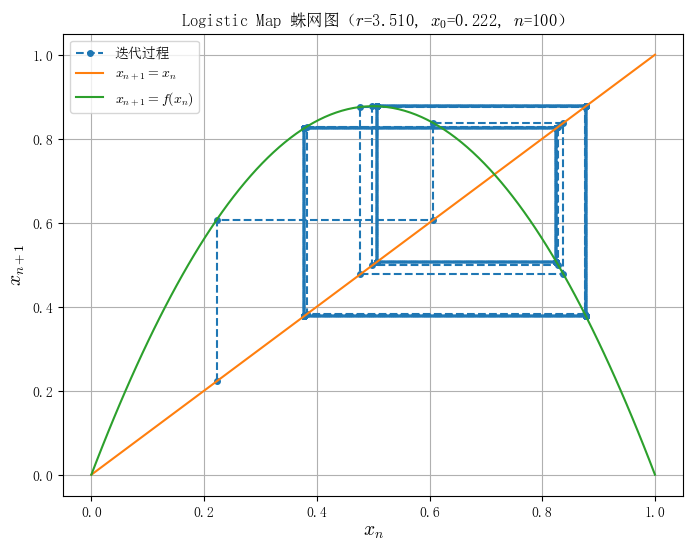

In [26]:
r_num = 3.51
x0 = 0.22222222
n = 100
map_func = lambda x: logistic_map(r_num, x)
fig, ax = plt.subplots(figsize=(8,6))
ax = plot_cobweb(ax, map_func, (0,1), 100, x0, n)
ax.grid()
ax.legend()
ax.set_xlabel("$x_{n}$")
ax.set_ylabel("$x_{n+1}$")
ax.set_title(f"Logistic Map 蛛网图（$r$={r_num:.3f}, $x_0$={x0:.3f}, $n$={n}）")
display_inline(fig)

可以看到 $x_0 = 0.2222222$ 也不是稳定的四阶不动点. 出现这个多余的点怀疑是求不动点时的数值误差导致的. 下面再次检查求出的所有不动点 `roots` 是否真的是不动点. 

In [27]:
f4_tmp(roots)

array([ 0.00000000e+00,  7.55569287e-01,  6.46689019e-01,  6.47201973e-01,
        6.51190094e-01,  6.54624196e-01,  6.53506745e-01,  1.34650069e-11,
       -1.49826818e-11,  1.89985805e-11,  1.19693144e-12, -3.24457128e-11,
        1.47858392e-11, -4.63379335e-11, -5.71497469e-01])

可以看到，确实有一些值误差很大（$0.1$ 量级），这里排除这些误差很大的点. 并再次寻找稳定不动点：

In [28]:
r_num = 3.51
f4_tmp = sym.lambdify(x, (f4-x).subs(r, r_num) , "numpy")
init_guesses = np.linspace(0, 1, 100) # 均匀选取 100 个猜测初始值
found = []
for guess in init_guesses:
    root, info, ier, mesg = fsolve(f4_tmp, guess, full_output=True)
    if ier == 1:
        found.append(root[0])
roots = np.array(sorted(list(set(np.round(found, 10))))).flatten()
roots = roots[np.abs(f4_tmp(roots))<10E-5] # 排除由于计算误差导致的错误值
print(f"一共找到 {len(roots)} 个不同的不动点")
print(roots)
df4 = sym.diff(f4,x)
df4_num = sym.lambdify(x, df4.subs(r, r_num), "numpy")
stable_roots = roots[(-1 < df4_num(roots)) & (df4_num(roots) < 1)]
print(f"一共找到 {len(stable_roots)} 个稳定不动点")
print(stable_roots)

一共找到 8 个不同的不动点
[0.         0.37772216 0.42640911 0.50671306 0.71509972 0.82501893
 0.85849118 0.87734182]
一共找到 4 个稳定不动点
[0.37772216 0.50671306 0.82501893 0.87734182]


找到的这四个稳定的四阶不动点就是我们在前面通过数值模拟得到的四个收敛值.

### $r=3.82842712 $

#### 数值探索

现在我们探究当 $r=3.82842712$ 时的情况，同样我们在 $[0,1]$ 内均匀取 $10$ 个点作为 $x_0$ 来绘制迭代过程：

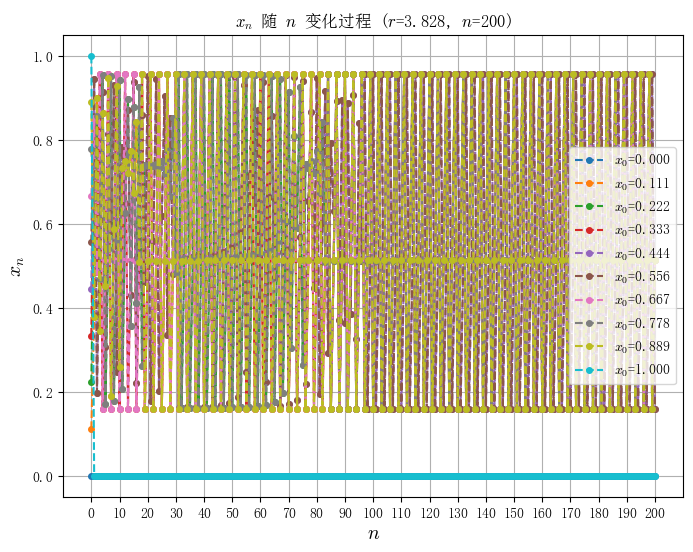

In [29]:
r_num = 3.82842712
x0 = np.linspace(0,1,10)
n = 200

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(x0)), dtype=np.float64)
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(x0):
    ax.plot(n_arr, xn_arr[:,i], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%10==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($r$={r_num:.3f}, $n$={n})")
ax.grid()
ax.legend()
display_inline(fig)

 除去前文我们已经探讨过的 $x_0=0$ 和 $x_0=1$ 收敛于 $0$ 这两个 Trival 的情况，我们发现，其他的初值在迭代次数足够多后的点分布在三条水平直线上，也就是在迭代次数足够多后，$x_n$ 会在三个值之间跳跃.

 我们选取其中的 $x_0 = 0.889$ 看看迭代过程.

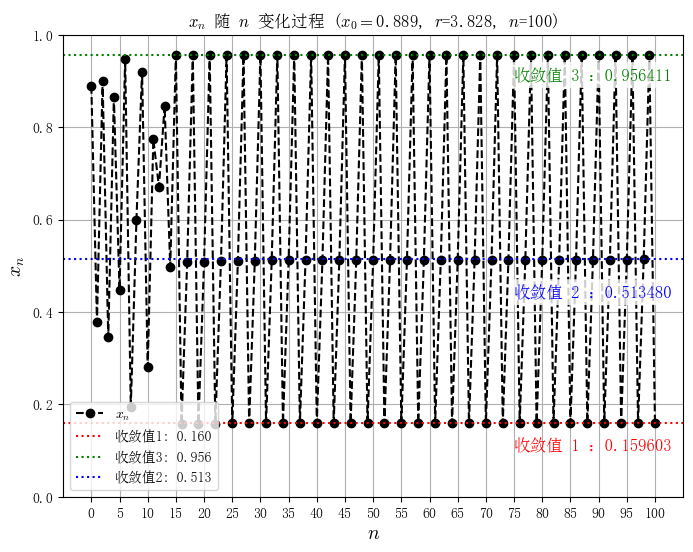

In [30]:
r_num = 3.82842712
x0 = 0.889
n = 100

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, 'k--o', label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%5==0])
ax.set_ylim(0,1)
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r_num:.3f}, $n$={n})")
ax.axhline(xn_arr[-1], color='r', linestyle=':', label=f"收敛值1: {xn_arr[-1]:.3f}")
ax.text(75, 0.1, f"收敛值 1 ：{xn_arr[-1]:.6f}", color='r', size=12)
ax.axhline(xn_arr[-2], color='g', linestyle=':', label=f"收敛值3: {xn_arr[-2]:.3f}")
ax.text(75, 0.9, f"收敛值 3 ：{xn_arr[-2]:.6f}", color='g', size=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))
ax.axhline(xn_arr[-3], color='b', linestyle=':', label=f"收敛值2: {xn_arr[-3]:.3f}")
ax.text(75, 0.43, f"收敛值 2 ：{xn_arr[-3]:.6f}", color='b', size=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))
ax.grid()
ax.legend()

display_inline(fig)

可以看到，当 $r=3.82842712$，$x_0=0.889$ 时最后 $x_n$ 在 $0.159603$、$0.513480$ 和 $0.956411$ 之间循环. 并且由前一张图我们知道对于任意的 $x\in (0,1)$ 均有这个性质. 这里我们绘制此时对应的蛛网图查看迭代过程：

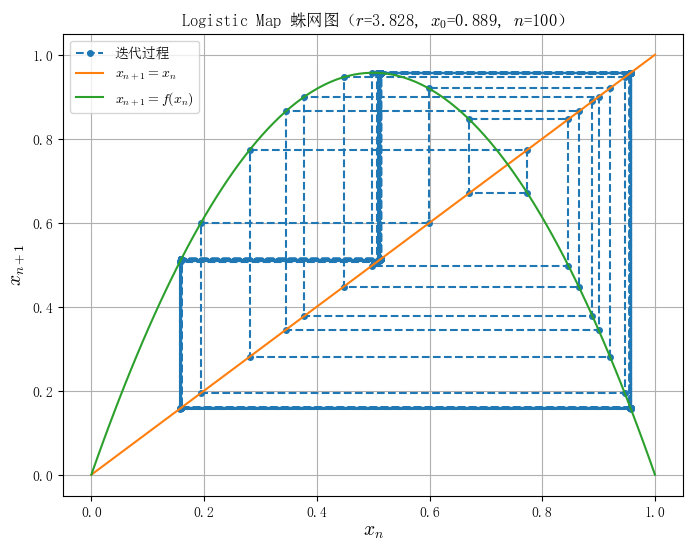

In [31]:
r = 3.82842712
x0 = 0.889
n = 100
map_func = lambda x: logistic_map(r, x)
fig, ax = plt.subplots(figsize=(8,6))
ax = plot_cobweb(ax, map_func, (0,1), 100, x0, n)
ax.grid()
ax.legend()
ax.set_xlabel("$x_{n}$")
ax.set_ylabel("$x_{n+1}$")
ax.set_title(f"Logistic Map 蛛网图（$r$={r:.3f}, $x_0$={x0:.3f}, $n$={n}）")
display_inline(fig)

可以看到在迭代到足够多的步骤后，蛛网图的迭代过程在一个六个点的“环”上.

#### 半解析分析

和前面 $r=3.51$ 时类似，由于最后 $x_n$ 会在 $3$ 个值之间循环，因此我们可以猜测 $x_n$ 最后会在三阶不动点循环，即不动点 $x^*$ 满足

$$ x^* = f_3 (x^*) $$

我们使用 `sympy` 来解析求解三阶不动点. 首先先定义函数：

In [32]:
sym.var("r,x")
f3 = fn(r, x, 3)
display(Math("f_3(x)=" + sym.latex(sym.simplify(f3))))

<IPython.core.display.Math object>

展开，有：

In [33]:
display(Math("f_3(x)=" + sym.latex(sym.expand(f3))))

<IPython.core.display.Math object>

可见这是一个 $8$ 阶多项式，我们尝试使用 `sympy` 求解不动点：

In [34]:
sym.solve(f3-x,x)

⎡   r - 1⎤
⎢0, ─────⎥
⎣     r  ⎦

意料之中的，`sympy` 并没能给出不 Trival 的解（这两个解是一阶不动点，一阶不动点显然也是三阶不动点），因此，我们还是使用数值求解的方式找寻三阶不动点和稳定的三阶不动点.

取 $r=3.82842712$，有

In [35]:
r_num = 3.82842712
f3_tmp = sym.lambdify(x, (f3-x).subs(r, r_num) , "numpy")
init_guesses = np.linspace(0, 1, 100) # 均匀选取 100 个猜测初始值
found = []
for guess in init_guesses:
    root, info, ier, mesg = fsolve(f3_tmp, guess, full_output=True)
    if ier == 1:
        found.append(root[0])
roots = np.array(sorted(list(set(np.round(found, 10))))).flatten()
roots = roots[np.abs(f3_tmp(roots))<10E-5] # 排除由于计算误差导致的错误值
print(f"一共找到 {len(roots)} 个不同的不动点")
print(roots)
display(Math("f_3(x) \\text{的导数为：}"))
df3 = sym.diff(f3,x)
display(Math("f'_3(x)=" + sym.latex(df3.expand())))
print(f"带入 r={r_num} 和前面求得的不动点：")
df3_num = sym.lambdify(x, df3.subs(r, r_num), "numpy")
stable_roots = roots[(-1 < df3_num(roots)) & (df3_num(roots) < 1)]
print(f"一共找到 {len(stable_roots)} 个稳定不动点")
print(stable_roots)

一共找到 10 个不同的不动点
[0.         0.15992882 0.51435527 0.51435527 0.51435528 0.51435528
 0.73879612 0.95631782 0.95631784 0.95631787]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

带入 r=3.82842712 和前面求得的不动点：
一共找到 5 个稳定不动点
[0.15992882 0.51435527 0.51435527 0.51435528 0.95631787]


这里我们一共找到了 $5$ 个稳定的三阶不动点，其中 $0.15992882$ 和 $0.95631787$ 和我们之前通过数值模拟得到的三个收敛值的其中两个几乎相同（数值有小的不同可能是因为数值误差造成的），

而这五个稳定的三阶不动点中有三个都约等于 $0.51435527$（显示默认为 8 位小数，而在排除重复的不动点时是取 10 位小数），而这个值也接近我们之前通过数值模拟得到的收敛值 $0.513480$.

#### 三阶不动点的稳定性的数值检验

为了验证 $0.15992882$、$0.95631787$、$0.51435527$ 这三个点确实是稳定的三阶不动点，我们取 $\delta_0=10^{-4}$，对每个不动点 $x^*$，以 $x_0 = x^*+\delta_0$ 为初值，绘制 $\delta_n = |x_n - x^*|$ 随 $n$ 的变化过程.

当然，由于是三阶不动点，因此我们会迭代三次计算一次 $\delta_n$.

其 $\delta_n$ 随 $n$ 的变化过程如下：

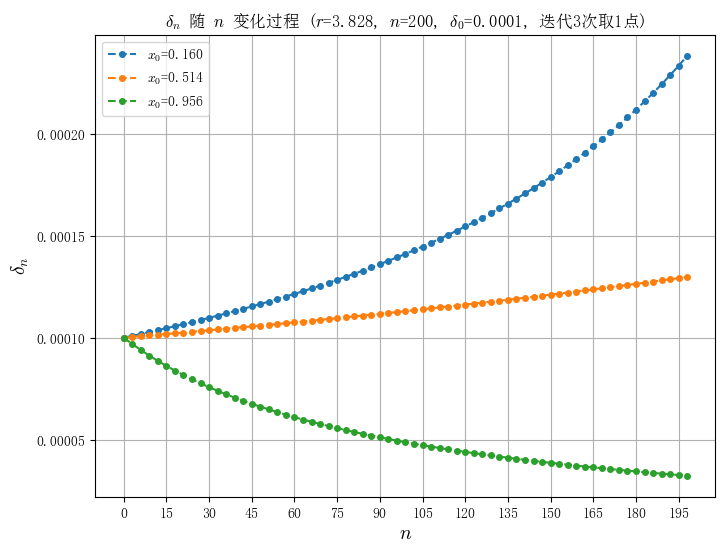

In [36]:
xp = np.array([0.15992882, 0.51435527, 0.95631787])
delta_0 = 1E-4
r_num = 3.82842712
n = 200

x0_arr = xp + delta_0

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(xp)), dtype=np.float64)
xn_arr[0] = x0_arr.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(xp+delta_0):
    xn = xn_arr[:,i]
    delta_n = xn - xp[i]
    ax.plot(n_arr[n_arr%3==0], delta_n[n_arr%3==0], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%15==0])
ax.set_ylabel("$\\delta_n$")
ax.set_title(f"$\\delta_n$ 随 $n$ 变化过程 ($r$={r_num:.3f}, $n$={n}, $\\delta_0$={delta_0}, 迭代3次取1点)")
ax.grid()
ax.legend()
display_inline(fig)

可以看见，对于 $0.95631787$，其确实是 $r=3.82842712$ 时 Logistic map 的一个稳定的三阶不动点，但对于另外两个，其偏差 $\delta_n$ 随着 $n$ 增大而增大. 看上去这并不是稳定的三阶不动点，因此我们需要解释为何在最开始的数值模拟中对于任意 $x\in(0,1)$ 均会收敛到这三个值.

我们选取 $x_0 = 0.15992882$ 绘制迭代过程：

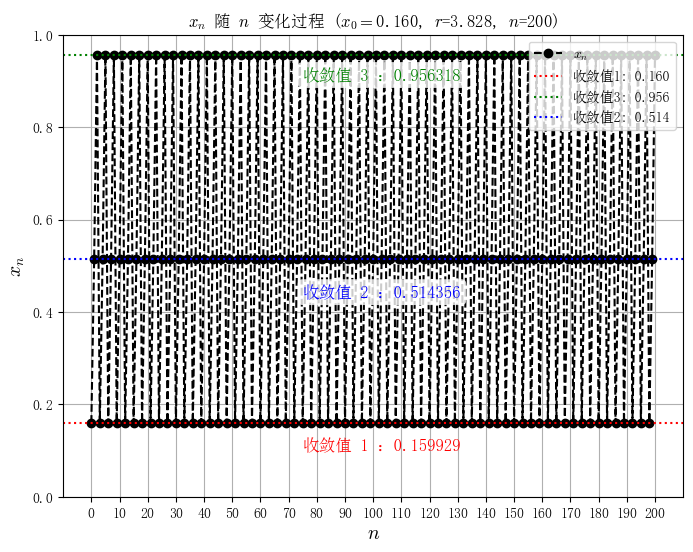

In [37]:
r_num = 3.82842712
x0 = 0.15992882
n = 200

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, 'k--o', label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%10==0])
ax.set_ylim(0,1)
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r_num:.3f}, $n$={n})")
ax.axhline(xn_arr[-3], color='r', linestyle=':', label=f"收敛值1: {xn_arr[-3]:.3f}")
ax.text(75, 0.1, f"收敛值 1 ：{xn_arr[-3]:.6f}", color='r', size=12)
ax.axhline(xn_arr[-1], color='g', linestyle=':', label=f"收敛值3: {xn_arr[-1]:.3f}")
ax.text(75, 0.9, f"收敛值 3 ：{xn_arr[-1]:.6f}", color='g', size=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))
ax.axhline(xn_arr[-2], color='b', linestyle=':', label=f"收敛值2: {xn_arr[-2]:.3f}")
ax.text(75, 0.43, f"收敛值 2 ：{xn_arr[-2]:.6f}", color='b', size=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))
ax.grid()
ax.legend()

display_inline(fig)

可见还是在这三个值之间循环，那是否是我们通过半解析分析时的数值误差导致我们所求的三阶不动点有偏差呢？如果是这样，那么 $\delta_n$ 随 $n$ 的曲线应该会增长后稳定下来，因此我们继续绘制 $\delta_n$ 随 $n$ 的变化曲线，这里取一个更大的 $n$

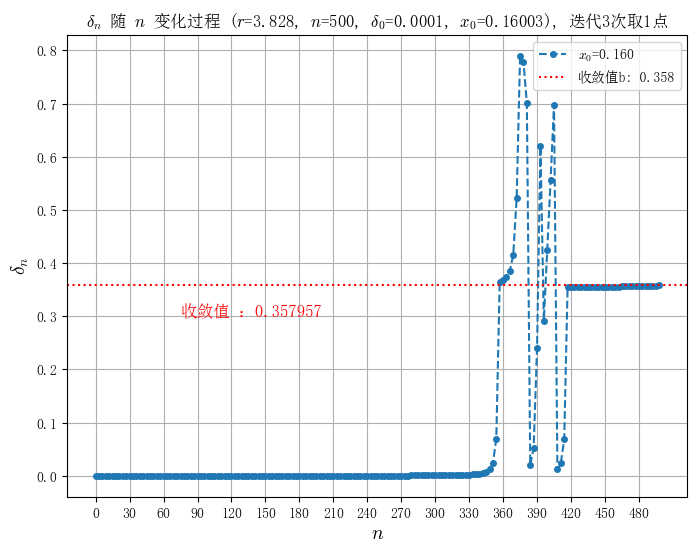

In [38]:
xp = np.array([0.15992882])
delta_0 = 1E-4
r_num = 3.82842712
n = 500

x0_arr = xp + delta_0

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(xp)), dtype=np.float64)
xn_arr[0] = x0_arr.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(xp+delta_0):
    xn = xn_arr[:,i]
    delta_n = xn - xp[i]
    ax.plot(n_arr[n_arr%3==0], delta_n[n_arr%3==0], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%30==0])
ax.set_ylabel("$\\delta_n$")
ax.set_title(f"$\\delta_n$ 随 $n$ 变化过程 ($r$={r_num:.3f}, $n$={n}, $\\delta_0$={delta_0}, $x_0$={xp[0]+delta_0:.5f}), 迭代3次取1点")
ax.axhline(delta_n[n_arr%3==0][-1], color='r', linestyle=':', label=f"收敛值b: {delta_n[n_arr%3==0][-1]:.3f}")
ax.text(75, 0.3, f"收敛值 ：{delta_n[n_arr%3==0][-1]:.6f}", color='r', size=12)
ax.grid()
ax.legend()
display_inline(fig)

$0.357957+0.15992882=0.51788582$，这和另外一个可能的稳定不动点很接近，也就是说，这个点和 $0.514$ 那个点可能都不是稳定的三阶不动点，迭代值 $x_n$ 不会一直呆在其中一个点附近，而是在附近一段时间后会“跳”到另外一个点附近.

为了验证上面的猜想，我们选取 $x_0 = 0.15992882 + 10^{-4}$ 绘制迭代过程，但这次我们每迭代三次取一次值，同时我们取一个比较大的 $n$ 值查看长期的演化过程：

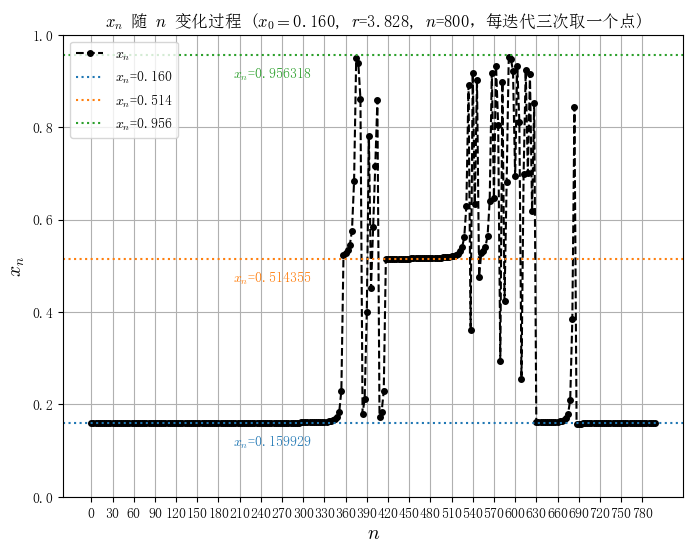

In [39]:
r_num = 3.82842712
x0 = 0.15992882 + 1E-4
n = 800

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr[n_arr%3==0], xn_arr[n_arr%3==0], 'k--o', markersize=4, label="$x_n$")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%30==0])
ax.set_ylim(0,1)
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r_num:.3f}, $n$={n}，每迭代三次取一个点)")
xp = np.array([0.15992882, 0.51435527, 0.95631787])
for pt in xp:
    color = ax._get_lines.get_next_color()
    line = ax.axhline(pt, linestyle=':', color=color, label=f"$x_n$={pt:.3f}")
    ax.text(200, pt-0.05, f"$x_n$={pt:.6f}", color=color)
ax.grid()
ax.legend()

display_inline(fig)

可以发现，$x_{3n}$ 出现了有意思的现象，其先保持在 $x^*=0.159929$ 附近，然后在迭代一定次数后“跳到”另一个三阶不动点 $x^*=0.514355$ 附近，在保持一定的时间后，又“跳回” 原先的三阶不动点 $x^*=0.159929$ 附近. 这并不像我们之前所认识的稳定不动点或不稳定不动点的情况（对于稳定不动点，其 $x_n$ 会一直保存在不动点附近，对于不稳定不动点，其 $x_n$ 会远离不动点）.

### $r=4$

#### 数值探索

现在我们探究当 $r=4$ 时的情况，同样我们在 $[0,1]$ 内均匀取 $10$ 个点作为 $x_0$ 来绘制迭代过程：

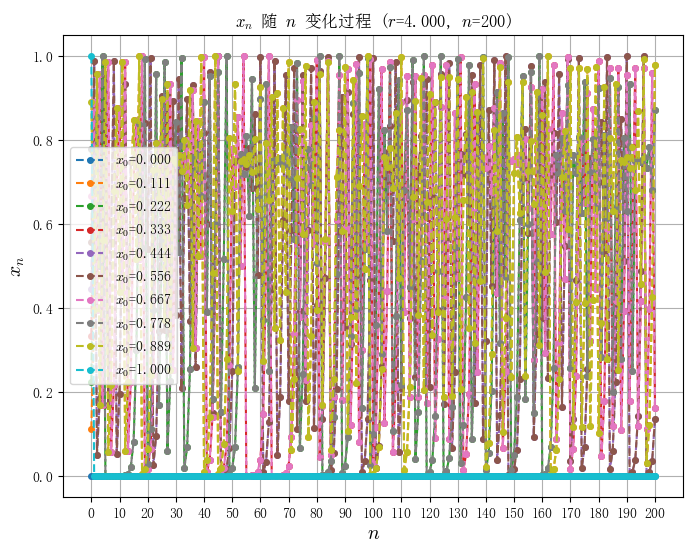

In [40]:
r_num = 4
x0 = np.linspace(0,1,10)
n = 200

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(x0)), dtype=np.float64)
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(x0):
    ax.plot(n_arr, xn_arr[:,i], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%10==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($r$={r_num:.3f}, $n$={n})")
ax.grid()
ax.legend()
display_inline(fig)

 除去前文我们已经探讨过的 $x_0=0$ 和 $x_0=1$ 收敛于 $0$ 这两个 Trival 的情况，我们发现，其他的初值的渐进过程我们并没有找到任何规律. 一个可能的原因是因为我们的 $n$ 不够大，使得 $x_n$ 没有收敛到最后的几个值. 因此，我们尝试设置更大的 $n$.

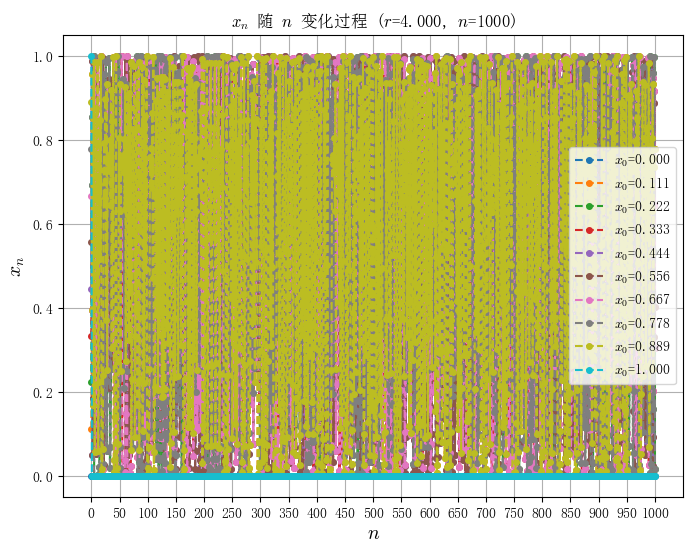

In [41]:
r_num = 4
x0 = np.linspace(0,1,10)
n = 1000

n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, len(x0)), dtype=np.float64)
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(figsize=(8,6))
for i, x in enumerate(x0):
    ax.plot(n_arr, xn_arr[:,i], '--o', markersize=4, label=f"$x_0$={x:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(n_arr[n_arr%50==0])
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程 ($r$={r_num:.3f}, $n$={n})")
ax.grid()
ax.legend()
display_inline(fig)

我们仍不能找到任何的规律，我们选取其中一个初值（$x_0 = 0.333$）查看情况：

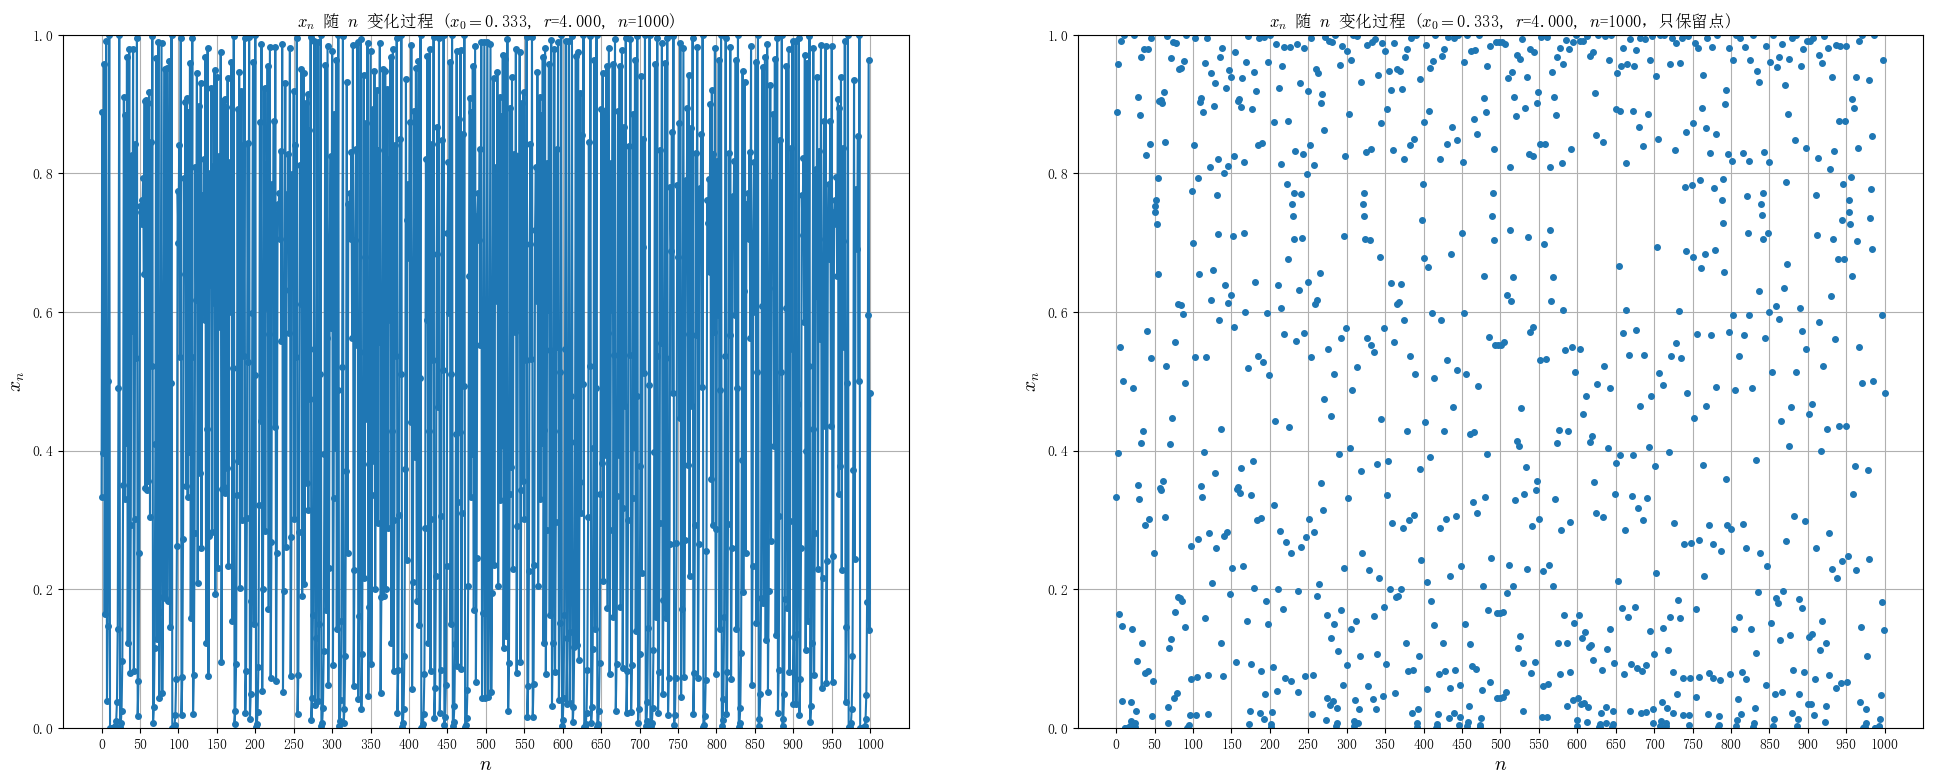

In [42]:
r_num = 4
x0 = 0.333
n = 1000

n_arr = np.arange(n+1)
xn_arr = np.zeros_like(n_arr, dtype=np.float64)
xn_arr[0] = x0
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])
fig, ax = plt.subplots(1,2,figsize=(24,9))
ax[0].plot(n_arr, xn_arr, '-o', markersize=4, label="$x_n$")
ax[0].set_xlabel("$n$")
ax[0].set_xticks(n_arr[n_arr%50==0])
ax[0].set_ylim(0,1)
ax[0].set_ylabel("$x_n$")
ax[0].set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r_num:.3f}, $n$={n})")
ax[0].grid()

ax[1].plot(n_arr, xn_arr, 'o', markersize=4, label="$x_n$")
ax[1].set_xlabel("$n$")
ax[1].set_xticks(n_arr[n_arr%50==0])
ax[1].set_ylim(0,1)
ax[1].set_ylabel("$x_n$")
ax[1].set_title(f"$x_n$ 随 $n$ 变化过程 ($x_0=${x0:.3f}, $r$={r_num:.3f}, $n$={n}，只保留点)")
ax[1].grid()

display_inline(fig)

可以看到，随着 $n$ 变化，$x_n$ 在 $(0,1)$ 的分布似乎并没有随着 $n$ 变化，$x_n$ 在 $(0,1)$ 内均会出现，不会在几个固定的值之间跳跃（即使 $n$ 足够大）

上述过程的蛛网图如下：

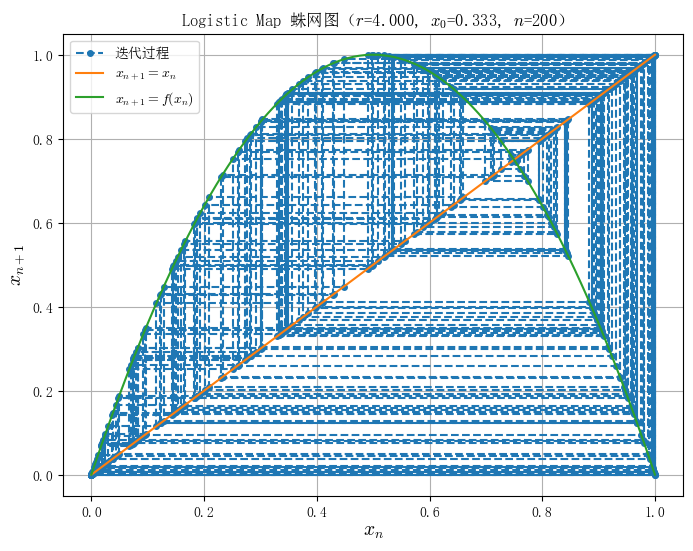

In [43]:
r_num = 4
x0 = 0.333
n = 200
map_func = lambda x: logistic_map(r_num, x)
fig, ax = plt.subplots(figsize=(8,6))
ax = plot_cobweb(ax, map_func, (0,1), 100, x0, n)
ax.grid()
ax.legend()
ax.set_xlabel("$x_{n}$")
ax.set_ylabel("$x_{n+1}$")
ax.set_title(f"Logistic Map 蛛网图（$r$={r_num:.3f}, $x_0$={x0:.3f}, $n$={n}）")
display_inline(fig)

可以看见，迭代的过程并不会停留在一个“环”上，其迭代过程几乎会遍历各个位置.

很明显，我们没有找到任何不动点的特征，因此我们也无法尝试通过解析或半解析分析不动点.

### $r$ 取其他值

之前我们讨论了 $r$ 取某些特殊值的情况，这里我们使用 `weiget` 来创建一个动态的绘图，来探索是否有更多的情况.

> 动态图需要运行才能显示交互.

In [44]:
fig1, ax1 = plt.subplots(1,2,figsize=(16,6))

@ipw.interact(
    r = ipw.FloatText(3.4),
    #r = (0, 4, 0.001),
    x0 = (0, 1, 0.01),
    n = (0, 500, 10)
)
def update_plot(r=1, x0=0.333, n=100):
    ax1[0].clear()
    ax1[1].clear()
    n_arr = np.arange(n+1)
    xn_arr = np.zeros(n+1)
    xn_arr[0] = x0
    for i in range(n):
        xn_arr[i+1] = logistic_map(r, xn_arr[i])
    ax1[0].plot(n_arr, xn_arr, "-o", markersize=4, label="$x_n$")
    ax1[0].legend()
    ax1[0].grid()
    ax1[0].set_xlabel("$n$")
    ax1[0].set_ylabel("$x_n$")
    ax1[0].set_title("$x_n$ 随 $n$ 变化过程")
    map_func = lambda x: logistic_map(r, x)
    ax1[1] = plot_cobweb(ax1[1], map_func, (0,1), 100, x0, n)
    ax1[1].set_xlabel("$x_n$")
    ax1[1].set_ylabel("$x_{n+1}$")
    ax1[1].legend()
    ax1[1].grid()
    ax1[1].set_title("Logistic Map 蛛网图")
    fig1.suptitle("$x_{n+1} = r x_n (1-x_n)$"+f" ($r$={r:.3f}, $x_0$={x0:.3f}, $n$={n})")
    display_inline(fig1)

interactive(children=(FloatText(value=3.4, description='r'), FloatSlider(value=0.333, description='x0', max=1.…

从中我们可以发现：

- $ 0 < r < 3 $ 时 $x_n$ 会收敛到一阶不动点（$0 \leq r \leq 1$ 时收敛到 $0$，$1 < r < 3$ 时收敛到某个非 $0$ 值）
- $ r = 3 $ 附近，一阶不动点“分裂” 成二阶不动点
- $ 3 < r < 3.45$ 时 $x_n$ 会在两个二阶不动点之间循环
- $ r = 3.45 $ 附近，二阶不动点“分裂”成四阶不动点
- $ 3.45 < r < 3.54 $ 时 $x_n$ 会在四个四阶不动点之间循环
- $ r = 3.54 $ 附近，四阶不动点“分裂”成八阶不动点
- 随着 $r$ 变大，不动点继续“分裂”，直至没有明显的周期行为
- $ r=3.82842712$ 时，短暂出现周期为 $3$ 的循环
- 随着 $r$ 增大，原本的周期行为消失

## Logistic Map 的分叉图

### 分叉图介绍

分叉图是动力系统理论中一个强大而直观的图形工具. 它用一张图清晰地展示了一个系统的长期行为是如何随着某个关键参数的变化而发生质的改变的.

- 横轴通常表示系统的控制参数
- 表示系统在长时间演化后，最终会达到的稳定状态。这可以是一个或多个具体的数值.

### 绘制思路

要绘制分叉图，比较重要的是如何得到系统长时间演化后的稳定状态. 这里采用如下方法.

1. 在定义域内随机选取一定数量（记为 $m$）的点，作为迭代的初始值.
2. 迭代一个比较大的次数 $n$，这一步是为了让 $x_n$ 能达到稳定状态
3. 迭代 $n_{\text{sample}}$ 次，每一次记录迭代的结果.
4. 上述 $m \cdot n_{\text{sample}}$ 个点就是可能的稳定状态.

上述过程得到的 $m \cdot n_{\text{sample}}$ 个点其实是给定 $r$ 后的稳定状态的一种**采样**（是否可以看成是某种 MC 采样？）. 我们对不同的 $r$ 进行上述过程，便得到分叉图.

### 具体绘制

考虑到之后可能会对不同的迭代过程绘制分叉图，这里抽象成一个函数（为了加快速度，要求 `map_func` 是向量化的）.

In [45]:
def bifurcation_diagram(ax, map_func, r_range, n_r, x_range, n_x, n_step, n_sample):
    r = np.linspace(r_range[0], r_range[1], n_r)
    x = np.random.uniform(x_range[0], x_range[1], n_x)
    r_tmp = r.reshape(n_r, 1) # 转为列向量，为了利用 broadcast

    # 到达稳定状态
    for _ in range(n_step):
        x = map_func(r_tmp, x)

    result = np.zeros((n_r, n_x, n_sample))
    for i in range(n_sample):
        x = map_func(r_tmp, x)
        result[:, :, i] = x
    x_plot = result.reshape(n_r, -1)
    ax.plot(r, x_plot, ',k', alpha=0.1) # 设置点为半透明的
    ax.set_ylim(x_range)
    ax.set_xlim(r_range)
    return ax, r, x_plot

绘制 Logistic Map 的分叉图.

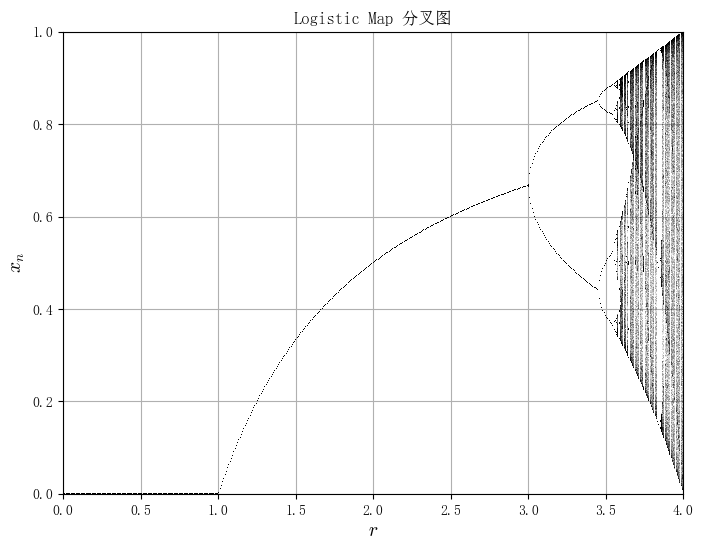

In [46]:
fig04, ax04 = plt.subplots(figsize=(8,6))
ax04, _, _ = bifurcation_diagram(ax04, logistic_map, (0., 4.), 500, (0., 1.), 20, 1000, 100)
ax04.set_xlabel("$r$")
ax04.set_ylabel("$x_n$")
ax04.set_title("Logistic Map 分叉图")
ax04.grid()
display_inline(fig04)

可以看到，在 $3<r<4$ 时，分叉图具有复杂的结构，这里我们针对这个范围进行放大.

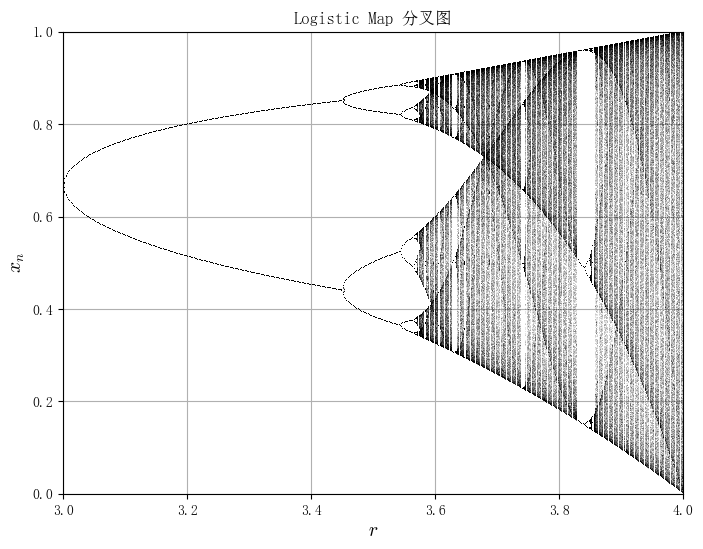

In [47]:
fig34, ax34 = plt.subplots(figsize=(8,6))
ax34, r34, x_plot34 = bifurcation_diagram(ax34, logistic_map, (3., 4.), 500, (0., 1.), 20, 1000, 100)
ax34.set_xlabel("$r$")
ax34.set_ylabel("$x_n$")
ax34.set_title("Logistic Map 分叉图")
ax34.grid()
display_inline(fig34)

可以看到不仅具有复杂的外形，同时图像的“深浅”也具有规律性，形成了几条曲线.由于绘制时点是半透明的，因此“深浅”的不同说明点最后的分布情况也有所不同. 这需要在后面进行分析.

另外也可以看到，在某些 $r$ 时 $x_n$ 是比较空白的，从而在图中呈现竖状条纹.

## Logistic Map 的分叉图的性质

### 分叉点

首先，从分叉图中我们可以直接看出之前探索不同 $r$ 的 $x_n$ 的迭代行为得到的几个值：

- 周期为 $1$ 循环变成周期为 $2$ 循环：$ r = 3 $
- 周期为 $2$ 循环变成周期为 $4$ 循环：$ r = 3.45 $
- 周期为 $4$ 循环变成周期为 $8$ 循环：$ r = 3.54 $
- 短暂的周期为 $3$ 循环：$r = 3.82842712$

> 由于绘制 Logistic Map 的用时比较长，因此后面的绘图使用前面的运算数据，因此需要保证运行的顺序.

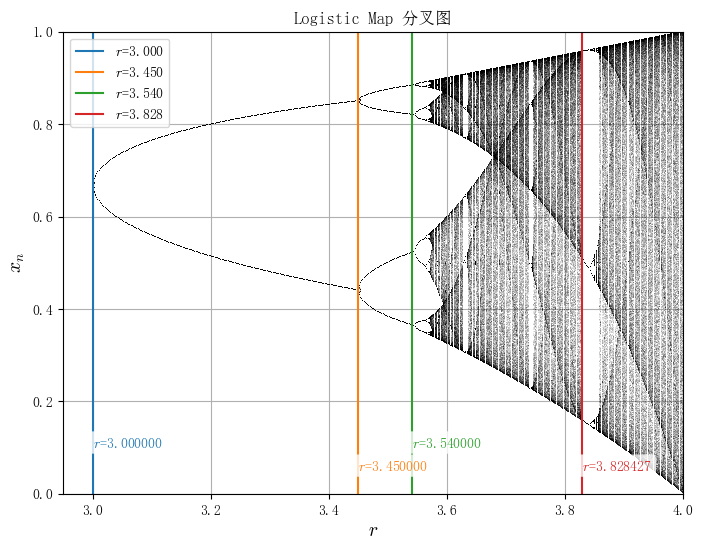

In [48]:
r_sep = np.array([3,3.45,3.54,3.82842712])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r34, x_plot34, ',k', alpha=0.1) # 设置点为半透明的
ax.set_ylim((0,1))
ax.set_xlim((2.95,4))
ax.set_xlabel("$r$")
ax.set_ylabel("$x_n$")
ax.set_title("Logistic Map 分叉图")
for i, rp in enumerate(r_sep):
    color = ax._get_lines.get_next_color()
    ax.text(rp, 0.1-(i%2)*0.05, f"$r$={rp:.6f}", color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))
    ax.axvline(rp, label=f"$r$={rp:.3f}", color=color)
ax.grid()
ax.legend(loc="upper left")
display_inline(fig)

可以看见，前面找到的周期变化的点均在图中得到显示.

### 上下界

可以看到，对于 Logistic Map 的分叉图，在 $r>3.6$ 时，其在 $x_n$ 上的分布是一片的，而不是几个固定的值. 虽然我们无法确定具体的值，那么我们能否确定其分布？

给定一个 $r$，我们可以将最后所有可能的 $x_n$ 看成一个集合 $S_r$，这个 $S_r$ 满足封闭性，即 $\forall x \in S_r$, $f(x) \in S_r$.

首先先从感觉较为简单的上下界进行分析. 由于 Logistic Map 为：

$$ x_{n+1} = r x_n (1-x_n) $$

不难得到，单次迭代在 $x_n = 0.5$ 时取到最值 $x_{n+1} = \frac{r}{4}$，因此若 $0.5 \in S_r$，则 $\frac{r}{4}$ 为 $S_r$ 中最大值. 这里绘图进行验证.

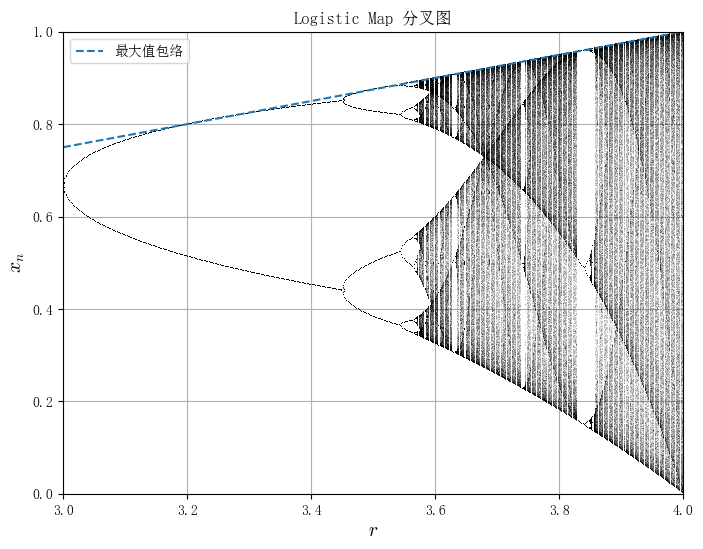

In [49]:
max_x = lambda r : r/4.0
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r34, x_plot34, ',k', alpha=0.1) # 设置点为半透明的
ax.plot(r34, max_x(r34), '--', label="最大值包络")
ax.set_ylim((0,1))
ax.set_xlim((3,4))
ax.set_xlabel("$r$")
ax.set_ylabel("$x_n$")
ax.set_title("Logistic Map 分叉图")
ax.grid()
ax.legend(loc="upper left")
display_inline(fig)

可以看到上界符合很好.

现在我们来尝试分析下界，对于 Logistic Map：

$$ x_{n+1} = r x_n (1-x_n) $$

要使得 $x_{n+1}$ 尽可能小，则要求 $x_n$ 尽可能原理对称轴 $0.5$，也就是要尽可能接近 $0$ 或 $1$. 最接近 $0$ 的就是下界本身，也就是下界可能是一阶不动点的值 $\frac{r-1}{r}$. 最接近 $1$ 的就是我们之前得到的上界 $\frac{r}{4}$. 计算：

$$ 1-\frac{r}{4} = \frac{4-r}{4} $$

和 $\frac{r-1}{r}$ 进行对比，当 $r>2$ 时，$\frac{4-r}{4} < \frac{r-1}{r}$，因此对于 $r>3.6$ 的“混沌区”，我们有 $S_r$ 的下界：

$$ f \left( \frac{r}{4} \right) = \frac{r^2 (4-r)}{16} $$

进行绘图验证：

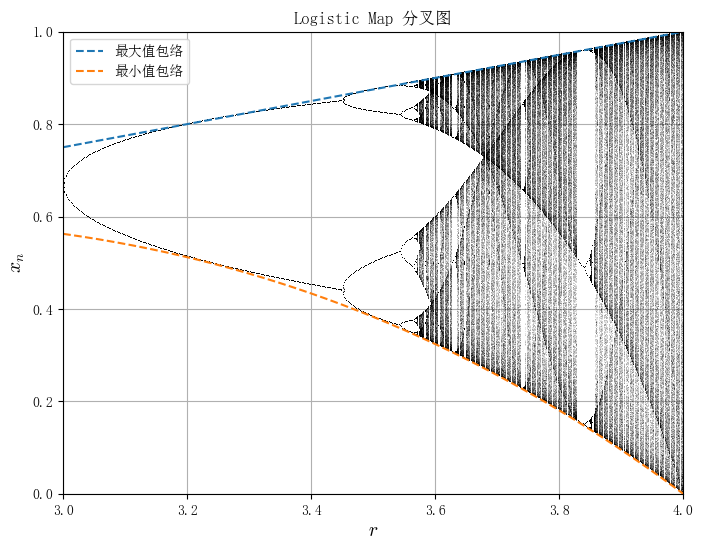

In [50]:
max_x = lambda r : r/4.0
min_x = lambda r : r**2 * (4-r)/16
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r34, x_plot34, ',k', alpha=0.1) # 设置点为半透明的
ax.plot(r34, max_x(r34), '--', label="最大值包络")
ax.plot(r34, min_x(r34), '--', label="最小值包络")
ax.set_ylim((0,1))
ax.set_xlim((3,4))
ax.set_xlabel("$r$")
ax.set_ylabel("$x_n$")
ax.set_title("Logistic Map 分叉图")
ax.grid()
ax.legend(loc="upper left")
display_inline(fig)

可以看到和图像符合很好.

### 其他的线

当然，一个待定的问题是上部分的下界和下部分的上界应该如何推导，更一般的，对于图中“密度”较高的线，为何这些“线”的点密度较高？这些线能否给出解析表达式？

这里给出一个可能的想法，对于集合 $S_r$，我们可以将其分成上下两部分 $S_{ru}$ 和 $S_{rl}$. 而区分这两个集合的分界是 $x_0$，其中 $x > x_0$ 的在在 $S_{ru}$，反之在 $S_{rl}$.

那么 $S_{ru}$ 中的点下次映射是保持在 $S_{ru}$，还是会到 $S_{rl}$，还是都有可能呢？这里尝试使用数值迭代进行验证.

观察分叉图，我们知道，当 $r=3.6$ 时，$S_{rl}$ 大概为：$(0.327,0.597)$, $S_{ru}$ 大概为：$(0.786,0.9)$, 我们在 $S_{rl}$ 中随机取点，查看迭代过程.

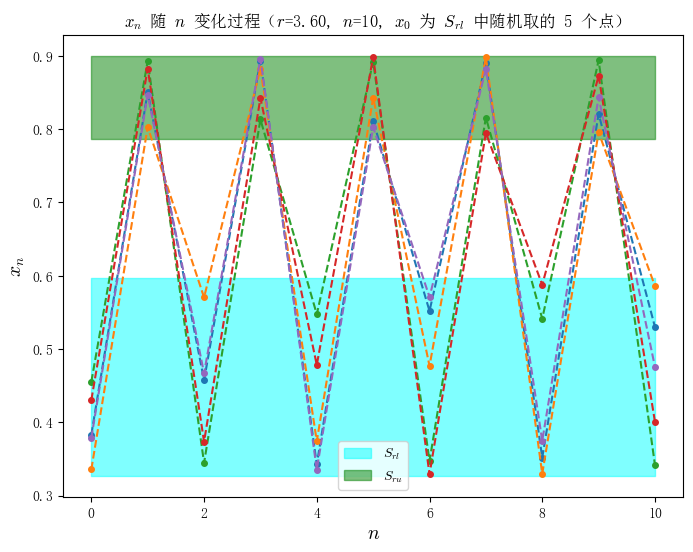

In [51]:
r_num = 3.6
n = 10
x_n = 5

x0 = np.random.uniform(0.327, 0.597, x_n)
n_arr = np.arange(n+1)
xn_arr = np.zeros((n+1, x_n))
xn_arr[0] = x0.copy()
for i in range(n):
    xn_arr[i+1] = logistic_map(r_num, xn_arr[i])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, xn_arr, '--o', markersize=4)
ax.fill_between(n_arr, 0.327, 0.597, color='cyan', alpha=0.5, label="$S_{rl}$")
ax.fill_between(n_arr, 0.786, 0.9, color='green', alpha=0.5, label="$S_{ru}$")
ax.legend()
ax.set_xlabel("$n$")
ax.set_ylabel("$x_n$")
ax.set_title(f"$x_n$ 随 $n$ 变化过程（$r$={r_num:.2f}, $n$={n}," + " $x_0$ 为 $S_{rl}$ 中随机取的 5 个点）")
display_inline(fig)

可以看到，$S_{rl}$ 迭代一次后到 $S_{ru}$，$S_{ru}$ 迭代一次后到 $S_{rl}$ （如何证明？）

那么，如果我们要求 $S_{ru}$ 的下界，就要找 $S_{rl}$ 离 $0.5$ 最远的值并迭代一次，前面我们推导了离 $0.5$ 最远的值是 $\frac{r}{4}$，也就是 $S_r$ 的上界（$r>2$）. 因此 $S_{ru}$ 的下界为：

$$ f\left( f \left( \frac{r}{4} \right) \right) = f_2 \left( \frac{r}{4} \right)$$

其中 $f_n(x)$ 为 $x \to f(x)$ 迭代 $n$ 次.

同理，如果我们要求 $S_{rl}$ 的上界，就要找 $S_{ru}$ 离 $0.5$ 最近的值并迭代一次，也就是 $S_{ru}$ 的下界，因此，$S_{rl}$ 的下界为：

$$ f_3 \left( \frac{r}{4} \right)$$

我们在分叉图上绘制并验证：

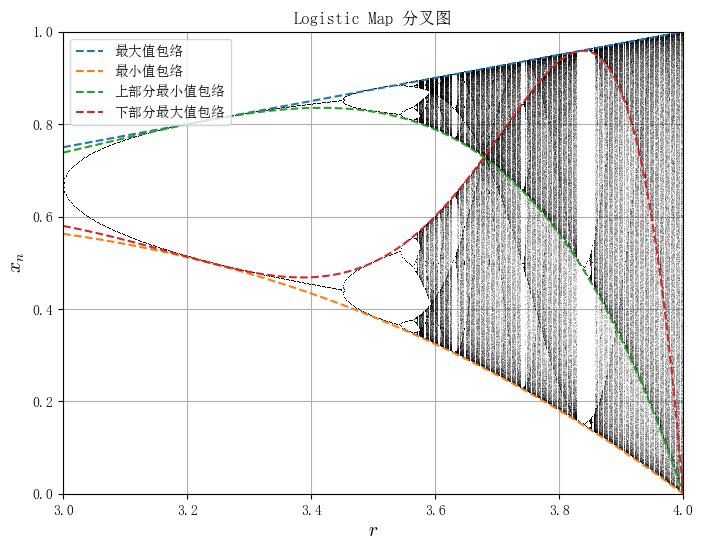

In [52]:
max_x = lambda r : r/4.0
min_x = lambda r : r**2 * (4-r)/16
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r34, x_plot34, ',k', alpha=0.1) # 设置点为半透明的
ax.plot(r34, max_x(r34), '--', label="最大值包络")
ax.plot(r34, min_x(r34), '--', label="最小值包络")
ax.plot(r34, fn(r34, r34/4, 2), '--', label="上部分最小值包络")
ax.plot(r34, fn(r34, r34/4, 3), '--', label="下部分最大值包络")
ax.set_ylim((0,1))
ax.set_xlim((3,4))
ax.set_xlabel("$r$")
ax.set_ylabel("$x_n$")
ax.set_title("Logistic Map 分叉图")
ax.grid()
ax.legend(loc="upper left")
display_inline(fig)

更一般的，我们可以绘制 $f_n \left( \frac{r}{4} \right)$

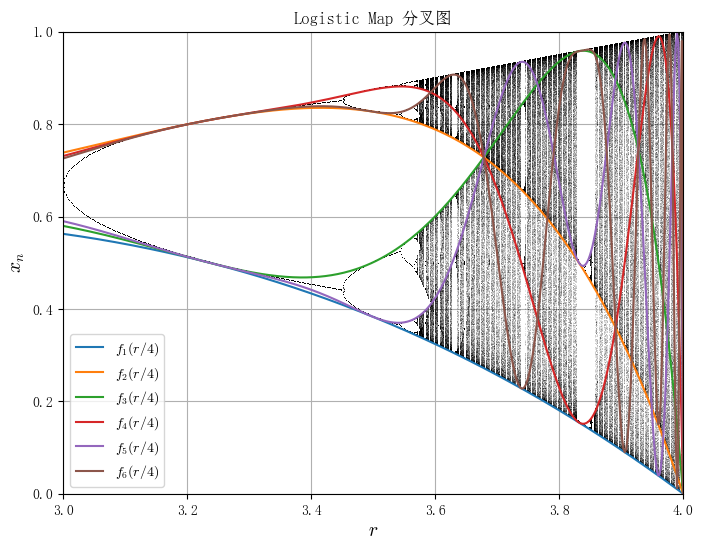

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r34, x_plot34, ',k', alpha=0.1) # 设置点为半透明的
for i in range(6):
    ax.plot(r34, fn(r34, r34/4, i+1), '-', label=f"$f_{i+1}(r/4)$")
ax.set_ylim((0,1))
ax.set_xlim((3,4))
ax.set_xlabel("$r$")
ax.set_ylabel("$x_n$")
ax.set_title("Logistic Map 分叉图")
ax.grid()
ax.legend(loc="lower left")
display_inline(fig)

可以看到，Logistic Map 分叉图中的更“深”的线满足：$f_n \left( \frac{r}{4} \right)$

当然，这需要解释为何这些线的颜色更“深”，即为何点更容易在这些“线”附近出现.

### 自相似性

由于 $r=3.82842712$ 短暂地出现了三周期循环，说明这个位置是比较特殊的，我们放大查看细节.

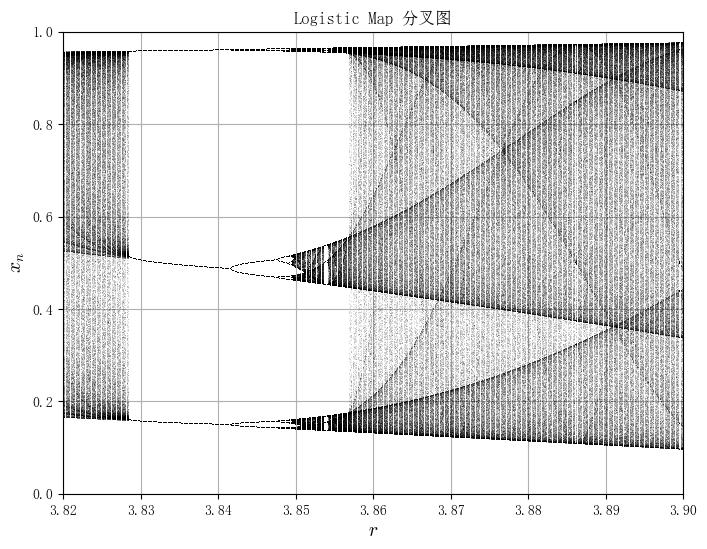

In [54]:
fig3839, ax3839 = plt.subplots(figsize=(8,6))
ax3839, _, _ = bifurcation_diagram(ax3839, logistic_map, (3.82, 3.9), 500, (0., 1.), 20, 1000, 100)
ax3839.set_xlabel("$r$")
ax3839.set_ylabel("$x_n$")
ax3839.set_title("Logistic Map 分叉图")
ax3839.grid()
display_inline(fig3839)

可以看到中间似乎出现了相似的结果，我们继续放大查看：

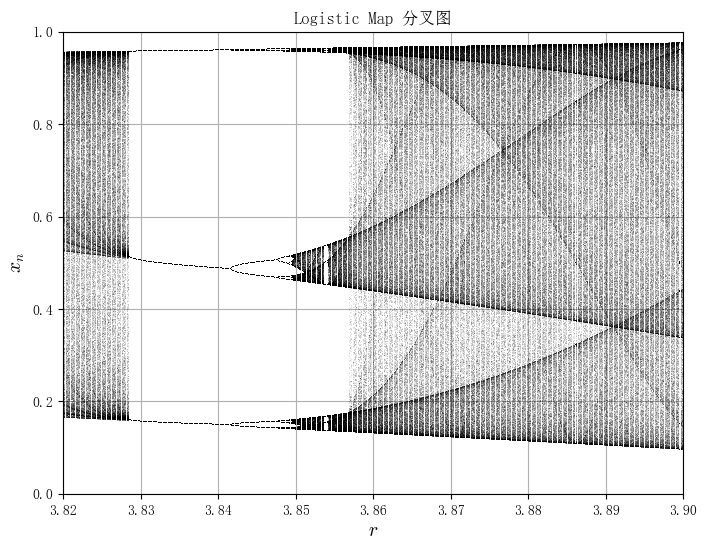

In [55]:
fig384386, ax384386 = plt.subplots(figsize=(8,6))
ax384386, _, _ = bifurcation_diagram(ax384386, logistic_map, (3.82, 3.9), 500, (0., 1.), 20, 1000, 100)
ax384386.set_xlabel("$r$")
ax384386.set_ylabel("$x_n$")
ax384386.set_title("Logistic Map 分叉图")
ax384386.grid()
display_inline(fig384386)

可以看到中间出现了和整体相似的结构，呈现某种自相似性质.

## 结论

## 参考资料

## 致谢

暂无

## 附一：问题

- 前面的半解析分析中，我尝试使用 `scipy` 的 `fsolve` 来求解所有的根，但得到了不满足的根，怀疑是因为浮点数的误差导致的（考虑到多项式的次数比较高，很可能导致的浮点精度误差被放大了），当然可以使用各种高精度计算库避免，但这就要自己实现 `fsolve` 函数，比较麻烦，并且运行效率低（`fsolve` 底层是调用 `C` 或 `Fortune` 的），这里没有进行实现，只是简单地检测并排除掉一些解（考虑到由于精度问题，求出的零点应该比实际更多？因此这样做也不容易导致漏解？）
  
- 对于循环为三的情况，其 $x_{3n}$ 并不会稳定住某个不动点，而是会在迭代一定次数后"跳"到另外一个不动点，再经过一段次数的迭代后"跳"回，如何解析地分析这个现象

- 为何在分叉图中 $f_n(r/4)$ 的线更"黑"，也就是为何点更容易出现在这些线附近？

- $S_{rl}$ 迭代后到 $S_{ru}$，$S_{ru}$ 迭代后到 $S_{rl}$，如何证明？如何解析推出？

- 给定一个 $r$，我们一般无法得到 $x_n$ 最后会在哪些点，那我们能否定义某种"概率"来描述？指定 $r$ 的"概率密度函数"是什么？能否解析给出？

- 分叉图竖状条纹出现的原因？自相似出现的原因？等等等等……

## 附二：学习心得